# Análise de Dados de Dengue no Brasil - 2025

## Objetivos da Análise:
1. **Incidência por faixa etária**: Crianças (0-15), Jovens (15-23), Adultos (23-60), Idosos (60+)
2. **Sintomas mais comuns** em cada faixa etária
3. **Casos por região do Brasil** e faixa etária mais atingida
4. **Mortalidade** por faixa etária

## 1. Importar Bibliotecas Necessárias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Configurações de visualização
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

# Configuração para exibir todas as colunas
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print("Bibliotecas importadas com sucesso!")

Bibliotecas importadas com sucesso!


In [2]:
# =============================================================================
# CRIAR PASTA PARA EXPORTAÇÃO DE GRÁFICOS
# =============================================================================

import os

# Criar pasta 'GRAFICOS' se não existir
pasta_graficos = 'GRAFICOS'
if not os.path.exists(pasta_graficos):
    os.makedirs(pasta_graficos)
    print(f"Pasta '{pasta_graficos}/' criada com sucesso!")
else:
    print(f"Pasta '{pasta_graficos}/' já existe.")

print(f"\nOs gráficos serão salvos em: {os.path.abspath(pasta_graficos)}")

Pasta 'GRAFICOS/' já existe.

Os gráficos serão salvos em: c:\Users\igor_\OneDrive\Área de Trabalho\GITHUB\ANALISE_DENGUE\GRAFICOS


## 2. Carregar e Explorar os Dados

In [3]:
# =============================================================================
# CARREGAR TODOS OS ARQUIVOS CSV DA PASTA BASE DE DADOS (2022-2025)
# =============================================================================

import glob
from pathlib import Path

# Definir pasta dos dados
pasta_dados = Path('BASE DE DADOS')

# Listar todos os arquivos DENGBR*.csv
arquivos_csv = sorted(pasta_dados.glob('DENGBR*.csv'))
print(f"Arquivos encontrados: {len(arquivos_csv)}")
for arq in arquivos_csv:
    print(f"  - {arq.name}")

# Carregar e concatenar todos os arquivos
lista_dfs = []
for arq in arquivos_csv:
    print(f"\nCarregando {arq.name}...", end=" ")
    df_temp = pd.read_csv(arq, encoding='latin-1', low_memory=False)
    # Extrair ano do nome do arquivo (ex: DENGBR25.csv -> 2025)
    ano = '20' + arq.stem.replace('DENGBR', '')
    df_temp['ANO_BASE'] = int(ano)
    lista_dfs.append(df_temp)
    print(f"{len(df_temp):,} registros")

# Concatenar todos os DataFrames
df = pd.concat(lista_dfs, ignore_index=True)

print(f"\n{'='*60}")
print(f"Dataset consolidado carregado com sucesso!")
print(f"Dimensoes: {df.shape[0]:,} linhas x {df.shape[1]} colunas")
print(f"Anos cobertos: {sorted(df['ANO_BASE'].unique())}")
print(f"\nRegistros por ano:")
print(df['ANO_BASE'].value_counts().sort_index())
print(f"\nPrimeiras linhas do dataset:")
df.head()

Arquivos encontrados: 4
  - DENGBR22.csv
  - DENGBR23.csv
  - DENGBR24.csv
  - DENGBR25.csv

Carregando DENGBR22.csv... 1,393,877 registros

Carregando DENGBR23.csv... 1,508,653 registros

Carregando DENGBR24.csv... 6,427,053 registros

Carregando DENGBR25.csv... 1,668,787 registros

Dataset consolidado carregado com sucesso!
Dimensoes: 10,998,370 linhas x 122 colunas
Anos cobertos: [np.int64(2022), np.int64(2023), np.int64(2024), np.int64(2025)]

Registros por ano:
ANO_BASE
2022    1393877
2023    1508653
2024    6427053
2025    1668787
Name: count, dtype: int64

Primeiras linhas do dataset:


,TP_NOT,ID_AGRAVO,DT_NOTIFIC,SEM_NOT,NU_ANO,SG_UF_NOT,ID_MUNICIP,ID_REGIONA,ID_UNIDADE,DT_SIN_PRI,SEM_PRI,ANO_NASC,NU_IDADE_N,CS_SEXO,CS_GESTANT,CS_RACA,CS_ESCOL_N,SG_UF,ID_MN_RESI,ID_RG_RESI,ID_PAIS,DT_INVEST,ID_OCUPA_N,FEBRE,MIALGIA,CEFALEIA,EXANTEMA,VOMITO,NAUSEA,DOR_COSTAS,CONJUNTVIT,ARTRITE,ARTRALGIA,PETEQUIA_N,LEUCOPENIA,LACO,DOR_RETRO,DIABETES,HEMATOLOG,HEPATOPAT,RENAL,HIPERTENSA,ACIDO_PEPT,AUTO_IMUNE,DT_CHIK_S1,DT_CHIK_S2,DT_PRNT,RES_CHIKS1,RES_CHIKS2,RESUL_PRNT,DT_SORO,RESUL_SORO,DT_NS1,RESUL_NS1,DT_VIRAL,RESUL_VI_N,DT_PCR,RESUL_PCR_,SOROTIPO,HISTOPA_N,IMUNOH_N,HOSPITALIZ,DT_INTERNA,UF,MUNICIPIO,TPAUTOCTO,COUFINF,COPAISINF,COMUNINF,CLASSI_FIN,CRITERIO,DOENCA_TRA,CLINC_CHIK,EVOLUCAO,DT_OBITO,DT_ENCERRA,ALRM_HIPOT,ALRM_PLAQ,ALRM_VOM,ALRM_SANG,ALRM_HEMAT,ALRM_ABDOM,ALRM_LETAR,ALRM_HEPAT,ALRM_LIQ,DT_ALRM,GRAV_PULSO,GRAV_CONV,GRAV_ENCH,GRAV_INSUF,GRAV_TAQUI,GRAV_EXTRE,GRAV_HIPOT,GRAV_HEMAT,GRAV_MELEN,GRAV_METRO,GRAV_SANG,GRAV_AST,GRAV_MIOC,GRAV_CONSC,GRAV_ORGAO,DT_GRAV,MANI_HEMOR,EPISTAXE,GENGIVO,METRO,PETEQUIAS,HEMATURA,SANGRAM,LACO_N,PLASMATICO,EVIDENCIA,PLAQ_MENOR,CON_FHD,COMPLICA,TP_SISTEMA,NDUPLIC_N,DT_DIGITA,CS_FLXRET,FLXRECEBI,MIGRADO_W,ANO_BASE
0,2,A90,2022-01-12,202202,2022,12,120020,1941.0,6801099.0,2022-01-06,202201,1975.0,4046,M,6.0,4.0,9.0,12,120033.0,1941.0,1.0,2022-01-12,NaN,1.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2022-01-12,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,1.0,NaN,NaN,1.0,NaN,2022-01-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2022-01-17,NaN,NaN,NaN,2022
1,2,A90,2022-08-11,202232,2022,12,120020,1941.0,5336171.0,2022-08-03,202231,1952.0,4069,M,6.0,4.0,9.0,12,120033.0,1941.0,1.0,2022-08-11,NaN,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,2022-10-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2022-08-12,NaN,NaN,NaN,2022
2,2,A90,2022-03-25,202212,2022,12,120020,1941.0,2002116.0,2022-03-21,202212,1966.0,4056,M,6.0,4.0,6.0,12,120020.0,1941.0,1.0,2022-03-25,NaN,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-25,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,1.0,NaN,NaN,1.0,NaN,2022-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2022-03-31,NaN,NaN,NaN,2022
3,2,A90,2022-03-07,202210,2022,12,120020,1941.0,6801099.0,2022-03-04,202209,1978.0,4043,M,6.0,4.0,3.0,12,120020.0,1941.0,1.0,2022-03-07,NaN,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-07,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,1.0,NaN,NaN,1.0,NaN,2022-03-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2022-03-23,NaN,NaN,NaN,2022
4,2,A90,2022-01-18,202203,2022,12,120020,1941.0,6801099.0,2022-01-18,202203,1977.0,4044,F,5.0,4.0,9.0,12,120020.0,1941.0,1.0,2022-01-18,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,2022-01-18,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,1.0,NaN,NaN,1.0,NaN,2022-01-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2022-01-26,NaN,NaN,NaN,2022


In [4]:
# Informações sobre as colunas
print("Informações do Dataset:")
print("=" * 50)
df.info()

Informações do Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10998370 entries, 0 to 10998369
Columns: 122 entries, TP_NOT to ANO_BASE
dtypes: float64(94), int64(9), object(19)
memory usage: 10.0+ GB


In [5]:
# Lista de todas as colunas
print("Colunas do dataset:")
print("=" * 50)
for i, col in enumerate(df.columns, 1):
    print(f"{i:3}. {col}")

Colunas do dataset:
  1. TP_NOT
  2. ID_AGRAVO
  3. DT_NOTIFIC
  4. SEM_NOT
  5. NU_ANO
  6. SG_UF_NOT
  7. ID_MUNICIP
  8. ID_REGIONA
  9. ID_UNIDADE
 10. DT_SIN_PRI
 11. SEM_PRI
 12. ANO_NASC
 13. NU_IDADE_N
 14. CS_SEXO
 15. CS_GESTANT
 16. CS_RACA
 17. CS_ESCOL_N
 18. SG_UF
 19. ID_MN_RESI
 20. ID_RG_RESI
 21. ID_PAIS
 22. DT_INVEST
 23. ID_OCUPA_N
 24. FEBRE
 25. MIALGIA
 26. CEFALEIA
 27. EXANTEMA
 28. VOMITO
 29. NAUSEA
 30. DOR_COSTAS
 31. CONJUNTVIT
 32. ARTRITE
 33. ARTRALGIA
 34. PETEQUIA_N
 35. LEUCOPENIA
 36. LACO
 37. DOR_RETRO
 38. DIABETES
 39. HEMATOLOG
 40. HEPATOPAT
 41. RENAL
 42. HIPERTENSA
 43. ACIDO_PEPT
 44. AUTO_IMUNE
 45. DT_CHIK_S1
 46. DT_CHIK_S2
 47. DT_PRNT
 48. RES_CHIKS1
 49. RES_CHIKS2
 50. RESUL_PRNT
 51. DT_SORO
 52. RESUL_SORO
 53. DT_NS1
 54. RESUL_NS1
 55. DT_VIRAL
 56. RESUL_VI_N
 57. DT_PCR
 58. RESUL_PCR_
 59. SOROTIPO
 60. HISTOPA_N
 61. IMUNOH_N
 62. HOSPITALIZ
 63. DT_INTERNA
 64. UF
 65. MUNICIPIO
 66. TPAUTOCTO
 67. COUFINF
 68. COPAISINF
 

## 2.1 Tratamento de Dados - Estrutura SINAN

Conversao dos tipos de dados conforme padroes do Sistema de Informacao de Agravos de Notificacao (SINAN):
- **Identificadores**: Codigos categoricos (nao devem ser somados)
- **Marcadores Temporais**: Datas e semanas epidemiologicas
- **Dados Demograficos**: Variaveis categoricas codificadas
- **Sintomas/Comorbidades**: Variaveis binarias (1=Sim, 2=Nao)
- **Classificacoes e Desfechos**: Variaveis categoricas

In [6]:
# =============================================================================
# DEFINICAO DAS COLUNAS POR CATEGORIA SINAN
# =============================================================================

# 1. IDENTIFICADORES (Codigos de Local e Unidade) - Tipo: category/string
colunas_identificadores = [
    'ID_AGRAVO', 'ID_MUNICIP', 'ID_REGIONA', 'ID_UNIDADE', 
    'ID_MN_RESI', 'ID_RG_RESI', 'ID_PAIS', 'CO_MUN_NOT', 
    'CO_MUN_RES', 'ID_OCUPA_N'
]

# 2. MARCADORES TEMPORAIS - Tipo: category/int (nao devem ser somados)
colunas_temporais = [
    'NU_ANO', 'SEM_NOT', 'SEM_PRI', 'ANO_NASC', 
    'DT_NOTIFIC', 'DT_SIN_PRI', 'DT_NASC', 'DT_INVEST',
    'DT_OBITO', 'DT_ENCERRA', 'DT_DIGITA'
]

# 3. DADOS DEMOGRAFICOS E SOCIAIS - Tipo: category
colunas_demograficas = [
    'TP_NOT', 'NU_IDADE_N', 'CS_SEXO', 'CS_GESTANT', 
    'CS_RACA', 'CS_ESCOL_N', 'SG_UF_NOT', 'SG_UF'
]

# 4. SINTOMAS E COMORBIDADES (1=Sim, 2=Nao) - Tipo: category
colunas_sintomas_binarios = [
    'FEBRE', 'MIALGIA', 'CEFALEIA', 'EXANTEMA', 'VOMITO', 'NAUSEA', 
    'DOR_COSTAS', 'CONJUNTVIT', 'ARTRITE', 'ARTRALGIA', 'PETEQUIA_N',
    'LEUCOPENIA', 'LACO', 'DOR_RETRO', 'DIABETES', 'HEMATOLOG', 
    'HEPATOPAT', 'RENAL', 'HIPERTENSA', 'ACIDO_PEPT', 'AUTO_IMUNE'
]

# 5. CLASSIFICACOES E DESFECHOS - Tipo: category
colunas_classificacao = [
    'CLASSI_FIN', 'CRITERIO', 'EVOLUCAO', 'SOROTIPO', 
    'TPAUTOCTO', 'HOSPITALI', 'RESUL_VI_N', 'RESUL_NS1',
    'HISTOPA_N', 'IMUNOH_N'
]

print("Categorias de colunas SINAN definidas:")
print(f"  - Identificadores: {len(colunas_identificadores)} colunas")
print(f"  - Temporais: {len(colunas_temporais)} colunas")
print(f"  - Demograficas: {len(colunas_demograficas)} colunas")
print(f"  - Sintomas/Comorbidades: {len(colunas_sintomas_binarios)} colunas")
print(f"  - Classificacoes: {len(colunas_classificacao)} colunas")

Categorias de colunas SINAN definidas:
  - Identificadores: 10 colunas
  - Temporais: 11 colunas
  - Demograficas: 8 colunas
  - Sintomas/Comorbidades: 21 colunas
  - Classificacoes: 10 colunas


In [7]:
# =============================================================================
# CONVERSAO DE TIPOS - IDENTIFICADORES PARA CATEGORY/STRING
# =============================================================================

print("Convertendo IDENTIFICADORES para tipo categorico...")
print("=" * 60)

for col in colunas_identificadores:
    if col in df.columns:
        tipo_original = df[col].dtype
        df[col] = df[col].astype('category')
        print(f"  {col}: {tipo_original} -> category")
    else:
        print(f"  {col}: NAO ENCONTRADA no dataset")

Convertendo IDENTIFICADORES para tipo categorico...
  ID_AGRAVO: object -> category
  ID_MUNICIP: int64 -> category
  ID_REGIONA: float64 -> category
  ID_UNIDADE: float64 -> category
  ID_MN_RESI: float64 -> category
  ID_RG_RESI: float64 -> category
  ID_PAIS: float64 -> category
  CO_MUN_NOT: NAO ENCONTRADA no dataset
  CO_MUN_RES: NAO ENCONTRADA no dataset
  ID_OCUPA_N: object -> category


In [8]:
# =============================================================================
# CONVERSAO DE TIPOS - MARCADORES TEMPORAIS
# =============================================================================

print("Convertendo MARCADORES TEMPORAIS...")
print("=" * 60)

colunas_datas = ['DT_NOTIFIC', 'DT_SIN_PRI', 'DT_NASC', 'DT_INVEST', 
                 'DT_OBITO', 'DT_ENCERRA', 'DT_DIGITA']

for col in colunas_datas:
    if col in df.columns:
        tipo_original = df[col].dtype
        df[col] = pd.to_datetime(df[col], format='%Y-%m-%d', errors='coerce')
        print(f"  {col}: {tipo_original} -> datetime64")

colunas_semanas = ['NU_ANO', 'SEM_NOT', 'SEM_PRI', 'ANO_NASC']

for col in colunas_semanas:
    if col in df.columns:
        tipo_original = df[col].dtype
        df[col] = df[col].astype('category')
        print(f"  {col}: {tipo_original} -> category")

# Verificar intervalo de datas
print("\n" + "=" * 60)
print("VERIFICACAO DO INTERVALO DE DATAS:")
for col in ['DT_NOTIFIC', 'DT_SIN_PRI']:
    if col in df.columns:
        min_data = df[col].min()
        max_data = df[col].max()
        print(f"  {col}: {min_data} ate {max_data}")

Convertendo MARCADORES TEMPORAIS...
  DT_NOTIFIC: object -> datetime64
  DT_SIN_PRI: object -> datetime64
  DT_INVEST: object -> datetime64
  DT_OBITO: object -> datetime64
  DT_ENCERRA: object -> datetime64
  DT_DIGITA: object -> datetime64
  NU_ANO: int64 -> category
  SEM_NOT: int64 -> category
  SEM_PRI: int64 -> category
  ANO_NASC: float64 -> category

VERIFICACAO DO INTERVALO DE DATAS:
  DT_NOTIFIC: 2022-01-02 00:00:00 ate 2026-01-05 00:00:00
  DT_SIN_PRI: 2022-01-02 00:00:00 ate 2026-01-03 00:00:00


In [9]:
# =============================================================================
# CONVERSAO DE TIPOS - DADOS DEMOGRAFICOS E SOCIAIS
# =============================================================================

print("Convertendo DADOS DEMOGRAFICOS para tipo categorico...")
print("=" * 60)

# Dicionarios de decodificacao SINAN
decodificacao_sinan = {
    'CS_SEXO': {
        'M': 'Masculino',
        'F': 'Feminino',
        'I': 'Ignorado'
    },
    'CS_GESTANT': {
        1: '1o Trimestre',
        2: '2o Trimestre', 
        3: '3o Trimestre',
        4: 'Idade gestacional ignorada',
        5: 'Nao',
        6: 'Nao se aplica',
        9: 'Ignorado'
    },
    'CS_RACA': {
        1: 'Branca',
        2: 'Preta',
        3: 'Amarela',
        4: 'Parda',
        5: 'Indigena',
        9: 'Ignorado'
    },
    'CS_ESCOL_N': {
        0: 'Analfabeto',
        1: '1a a 4a serie incompleta',
        2: '4a serie completa',
        3: '5a a 8a serie incompleta',
        4: 'Ensino fundamental completo',
        5: 'Ensino medio incompleto',
        6: 'Ensino medio completo',
        7: 'Educacao superior incompleta',
        8: 'Educacao superior completa',
        9: 'Ignorado',
        10: 'Nao se aplica'
    },
    'TP_NOT': {
        1: 'Negativa',
        2: 'Individual',
        3: 'Surto'
    }
}

for col in colunas_demograficas:
    if col in df.columns:
        tipo_original = df[col].dtype
        df[col] = df[col].astype('category')
        print(f"  {col}: {tipo_original} -> category")

print("\nDicionarios de decodificacao SINAN carregados para:")
for chave in decodificacao_sinan.keys():
    print(f"  - {chave}")

Convertendo DADOS DEMOGRAFICOS para tipo categorico...
  TP_NOT: int64 -> category
  NU_IDADE_N: int64 -> category
  CS_SEXO: object -> category
  CS_GESTANT: float64 -> category
  CS_RACA: float64 -> category
  CS_ESCOL_N: float64 -> category
  SG_UF_NOT: int64 -> category
  SG_UF: int64 -> category

Dicionarios de decodificacao SINAN carregados para:
  - CS_SEXO
  - CS_GESTANT
  - CS_RACA
  - CS_ESCOL_N
  - TP_NOT


In [10]:
# =============================================================================
# CONVERSAO DE TIPOS - SINTOMAS E COMORBIDADES (Binarias 1=Sim, 2=Nao)
# =============================================================================

print("Convertendo SINTOMAS E COMORBIDADES para tipo categorico...")
print("=" * 60)

# Decodificacao padrao para variaveis binarias SINAN
decodificacao_binaria = {
    1: 'Sim',
    2: 'Nao',
    9: 'Ignorado'
}

sintomas_encontrados = []
for col in colunas_sintomas_binarios:
    if col in df.columns:
        tipo_original = df[col].dtype
        df[col] = df[col].astype('category')
        sintomas_encontrados.append(col)
        print(f"  {col}: {tipo_original} -> category")

print(f"\nTotal de colunas de sintomas encontradas: {len(sintomas_encontrados)}")
print(f"Codificacao: 1=Sim, 2=Nao, 9=Ignorado")

Convertendo SINTOMAS E COMORBIDADES para tipo categorico...
  FEBRE: float64 -> category
  MIALGIA: float64 -> category
  CEFALEIA: float64 -> category
  EXANTEMA: float64 -> category
  VOMITO: float64 -> category
  NAUSEA: float64 -> category
  DOR_COSTAS: float64 -> category
  CONJUNTVIT: float64 -> category
  ARTRITE: float64 -> category
  ARTRALGIA: float64 -> category
  PETEQUIA_N: float64 -> category
  LEUCOPENIA: float64 -> category
  LACO: float64 -> category
  DOR_RETRO: float64 -> category
  DIABETES: float64 -> category
  HEMATOLOG: float64 -> category
  HEPATOPAT: float64 -> category
  RENAL: float64 -> category
  HIPERTENSA: float64 -> category
  ACIDO_PEPT: float64 -> category
  AUTO_IMUNE: float64 -> category

Total de colunas de sintomas encontradas: 21
Codificacao: 1=Sim, 2=Nao, 9=Ignorado


In [11]:
# =============================================================================
# CONVERSAO DE TIPOS - CLASSIFICACOES E DESFECHOS
# =============================================================================

print("Convertendo CLASSIFICACOES E DESFECHOS para tipo categorico...")
print("=" * 60)

# Dicionarios de decodificacao para classificacoes
decodificacao_classificacao = {
    'CLASSI_FIN': {
        1: 'Dengue',
        2: 'Dengue com sinais de alarme',
        3: 'Dengue grave',
        4: 'Descartado',
        5: 'Inconclusivo',
        8: 'Dengue classica (criterio antigo)',
        10: 'Dengue (criterio antigo)',
        11: 'Dengue com complicacoes (criterio antigo)',
        12: 'Febre hemorragica da dengue (criterio antigo)',
        13: 'Sindrome do choque da dengue (criterio antigo)'
    },
    'CRITERIO': {
        1: 'Laboratorio',
        2: 'Clinico-epidemiologico',
        3: 'Em investigacao'
    },
    'EVOLUCAO': {
        1: 'Cura',
        2: 'Obito pelo agravo notificado',
        3: 'Obito por outras causas',
        9: 'Ignorado'
    },
    'TPAUTOCTO': {
        1: 'Sim',
        2: 'Nao',
        3: 'Indeterminado'
    },
    'HOSPITALI': {
        1: 'Sim',
        2: 'Nao',
        9: 'Ignorado'
    }
}

for col in colunas_classificacao:
    if col in df.columns:
        tipo_original = df[col].dtype
        df[col] = df[col].astype('category')
        print(f"  {col}: {tipo_original} -> category")

print("\nDicionarios de decodificacao de classificacoes carregados para:")
for chave in decodificacao_classificacao.keys():
    print(f"  - {chave}")

Convertendo CLASSIFICACOES E DESFECHOS para tipo categorico...
  CLASSI_FIN: float64 -> category
  CRITERIO: float64 -> category
  EVOLUCAO: float64 -> category
  SOROTIPO: float64 -> category
  TPAUTOCTO: float64 -> category
  RESUL_VI_N: float64 -> category
  RESUL_NS1: float64 -> category
  HISTOPA_N: float64 -> category
  IMUNOH_N: float64 -> category

Dicionarios de decodificacao de classificacoes carregados para:
  - CLASSI_FIN
  - CRITERIO
  - EVOLUCAO
  - TPAUTOCTO
  - HOSPITALI


In [12]:
# =============================================================================
# TRATAMENTO DA COLUNA DE IDADE (NU_IDADE_N)
# =============================================================================

print("Tratamento especial da coluna de IDADE (NU_IDADE_N)...")
print("=" * 60)

def decodificar_idade_sinan(valor):
    """Decodifica a idade do formato SINAN para anos."""
    try:
        valor = int(valor)
        if valor < 1000:
            return valor
        
        tipo = valor // 1000
        quantidade = valor % 1000
        
        if tipo == 4:
            return quantidade
        elif tipo == 3:
            return quantidade / 12
        elif tipo == 2:
            return quantidade / 365
        elif tipo == 1:
            return quantidade / (365 * 24)
        else:
            return np.nan
    except:
        return np.nan

if 'NU_IDADE_N' in df.columns:
    amostra_idade = df['NU_IDADE_N'].dropna().head(10).tolist()
    print(f"Amostra de NU_IDADE_N (dados brutos): {amostra_idade}")
    
    max_valor = pd.to_numeric(df['NU_IDADE_N'], errors='coerce').max()
    
    if max_valor > 1000:
        print(f"\nDetectado formato codificado SINAN (max: {max_valor})")
        print("\nPadrao: 4xxx=Anos, 3xxx=Meses, 2xxx=Dias, 1xxx=Horas")
        
        df['IDADE_ANOS'] = df['NU_IDADE_N'].apply(decodificar_idade_sinan)
        
        print("\nExemplos de decodificacao aplicada:")
        exemplos = df[['NU_IDADE_N', 'IDADE_ANOS']].dropna().head(10)
        print(exemplos.to_string(index=False))
    else:
        print(f"\nFormato ja em anos (max: {max_valor})")
        df['IDADE_ANOS'] = pd.to_numeric(df['NU_IDADE_N'], errors='coerce')
    
    print(f"\nEstatisticas da idade em anos:")
    print(df['IDADE_ANOS'].describe())
    
    print("\nDistribuicao por unidade de tempo:")
    df_temp = pd.to_numeric(df['NU_IDADE_N'], errors='coerce')
    df['UNIDADE_IDADE'] = (df_temp // 1000).map({1: 'Horas', 2: 'Dias', 3: 'Meses', 4: 'Anos'})
    print(df['UNIDADE_IDADE'].value_counts())
else:
    print("Coluna NU_IDADE_N nao encontrada")

Tratamento especial da coluna de IDADE (NU_IDADE_N)...
Amostra de NU_IDADE_N (dados brutos): [4046, 4069, 4056, 4043, 4044, 4026, 4054, 4046, 4062, 4069]

Detectado formato codificado SINAN (max: 4999)

Padrao: 4xxx=Anos, 3xxx=Meses, 2xxx=Dias, 1xxx=Horas

Exemplos de decodificacao aplicada:
NU_IDADE_N  IDADE_ANOS
      4046        46.0
      4069        69.0
      4056        56.0
      4043        43.0
      4044        44.0
      4026        26.0
      4054        54.0
      4046        46.0
      4062        62.0
      4069        69.0

Estatisticas da idade em anos:
count    1.099837e+07
mean     3.582587e+01
std      2.010730e+01
min      0.000000e+00
25%      2.000000e+01
50%      3.400000e+01
75%      5.000000e+01
max      9.990000e+02
Name: IDADE_ANOS, dtype: float64

Distribuicao por unidade de tempo:
UNIDADE_IDADE
Anos     10904157
Meses       58530
Dias        35040
Horas         181
Name: count, dtype: int64


In [13]:
# =============================================================================
# RESUMO DO TRATAMENTO DE DADOS
# =============================================================================

print("RESUMO DO TRATAMENTO DE DADOS SINAN")
print("=" * 70)

# Contar tipos de dados
tipos = df.dtypes.value_counts()
print("\nDistribuicao dos tipos de dados apos tratamento:")
for tipo, contagem in tipos.items():
    print(f"  {tipo}: {contagem} colunas")

# Verificar colunas categoricas
categoricas = df.select_dtypes(include=['category']).columns.tolist()
print(f"\nTotal de colunas categoricas: {len(categoricas)}")

# Verificar colunas datetime
datetimes = df.select_dtypes(include=['datetime64']).columns.tolist()
print(f"Total de colunas datetime: {len(datetimes)}")

# Verificar colunas numericas
numericas = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(f"Total de colunas numericas: {len(numericas)}")

# Memoria utilizada
memoria_mb = df.memory_usage(deep=True).sum() / 1024**2
print(f"\nMemoria utilizada pelo DataFrame: {memoria_mb:.2f} MB")

print("\n" + "=" * 70)
print("Tratamento de dados SINAN concluido!")

RESUMO DO TRATAMENTO DE DADOS SINAN

Distribuicao dos tipos de dados apos tratamento:
  float64: 56 colunas
  category: 21 colunas
  object: 11 colunas
  datetime64[ns]: 6 colunas
  category: 5 colunas
  category: 2 colunas
  category: 2 colunas
  category: 1 colunas
  category: 1 colunas
  category: 1 colunas
  category: 1 colunas
  category: 1 colunas
  category: 1 colunas
  category: 1 colunas
  category: 1 colunas
  category: 1 colunas
  category: 1 colunas
  category: 1 colunas
  category: 1 colunas
  category: 1 colunas
  category: 1 colunas
  category: 1 colunas
  category: 1 colunas
  category: 1 colunas
  category: 1 colunas
  category: 1 colunas
  category: 1 colunas
  int64: 1 colunas

Total de colunas categoricas: 50
Total de colunas datetime: 6
Total de colunas numericas: 57

Memoria utilizada pelo DataFrame: 10008.96 MB

Tratamento de dados SINAN concluido!


## 3. Criar Faixas Etárias

Categorização das idades:
- **Crianças**: 0 a 15 anos
- **Jovens**: 15 a 23 anos  
- **Adultos**: 23 a 60 anos
- **Idosos**: 60+ anos

In [14]:
# =============================================================================
# VERIFICACAO DA COLUNA IDADE_ANOS
# =============================================================================

print("Verificando a coluna IDADE_ANOS:")
print("=" * 70)

if 'IDADE_ANOS' in df.columns:
    print(f"\nColuna IDADE_ANOS encontrada!")
    
    # Distribuicao de idades validas
    print(f"\nDistribuicao de registros:")
    print(f"  - Total de registros: {len(df):,}")
    print(f"  - Idades validas: {df['IDADE_ANOS'].notna().sum():,}")
    print(f"  - Idades ausentes/invalidas: {df['IDADE_ANOS'].isna().sum():,}")
    
    # Verificar distribuicao por unidade de tempo original
    if 'UNIDADE_IDADE' in df.columns:
        print(f"\nDistribuicao por unidade de tempo original:")
        print(df['UNIDADE_IDADE'].value_counts())
    
    # Verificar faixas de idade
    print(f"\nDistribuicao por faixas:")
    print(f"  - 0 a 15 anos: {((df['IDADE_ANOS'] >= 0) & (df['IDADE_ANOS'] <= 15)).sum():,}")
    print(f"  - 15 a 23 anos: {((df['IDADE_ANOS'] > 15) & (df['IDADE_ANOS'] <= 23)).sum():,}")
    print(f"  - 23 a 60 anos: {((df['IDADE_ANOS'] > 23) & (df['IDADE_ANOS'] <= 60)).sum():,}")
    print(f"  - Maiores de 60 anos: {(df['IDADE_ANOS'] > 60).sum():,}")
else:
    print("ATENCAO: Coluna IDADE_ANOS nao encontrada!")
    print("Execute a secao de tratamento SINAN primeiro (Secao 2.1).")

Verificando a coluna IDADE_ANOS:

Coluna IDADE_ANOS encontrada!

Distribuicao de registros:
  - Total de registros: 10,998,370
  - Idades validas: 10,998,370
  - Idades ausentes/invalidas: 0

Distribuicao por unidade de tempo original:
UNIDADE_IDADE
Anos     10904157
Meses       58530
Dias        35040
Horas         181
Name: count, dtype: int64

Distribuicao por faixas:
  - 0 a 15 anos: 1,898,084
  - 15 a 23 anos: 1,556,891
  - 23 a 60 anos: 6,100,176
  - Maiores de 60 anos: 1,443,219


In [15]:
# =============================================================================
# CRIAR COLUNA DE FAIXA ETARIA
# =============================================================================

def classificar_faixa_etaria(idade):

    if pd.isna(idade) or idade < 0:
        return 'Nao informado'
    elif idade <= 15:
        return 'Criancas (0-15)'
    elif idade <= 23:
        return 'Jovens (15-23)'
    elif idade <= 60:
        return 'Adultos (23-60)'
    else:
        return 'Idosos (60+)'

# Aplicar classificacao
df['FAIXA_ETARIA'] = df['IDADE_ANOS'].apply(classificar_faixa_etaria)

# Converter para categoria ordenada
ordem_faixas = ['Criancas (0-15)', 'Jovens (15-23)', 'Adultos (23-60)', 'Idosos (60+)', 'Nao informado']
df['FAIXA_ETARIA'] = pd.Categorical(df['FAIXA_ETARIA'], categories=ordem_faixas, ordered=True)

# Contagem por faixa etaria
print("\nDistribuicao por Faixa Etaria:")
print("=" * 70)
contagem_faixa = df['FAIXA_ETARIA'].value_counts().sort_index()

for faixa in ordem_faixas:
    if faixa in contagem_faixa.index:
        qtd = contagem_faixa[faixa]
        pct = (qtd / len(df)) * 100
        print(f"  {faixa:20} : {qtd:>10,} casos ({pct:>5.2f}%)")

# Resumo
total_validos = len(df) - contagem_faixa.get('Nao informado', 0)
print(f"\n  {'TOTAL VALIDOS':20} : {total_validos:>10,} casos")
print(f"  {'TOTAL GERAL':20} : {len(df):>10,} casos")


Distribuicao por Faixa Etaria:
  Criancas (0-15)      :  1,898,084 casos (17.26%)
  Jovens (15-23)       :  1,556,891 casos (14.16%)
  Adultos (23-60)      :  6,100,176 casos (55.46%)
  Idosos (60+)         :  1,443,219 casos (13.12%)
  Nao informado        :          0 casos ( 0.00%)

  TOTAL VALIDOS        : 10,998,370 casos
  TOTAL GERAL          : 10,998,370 casos


Grafico salvo em: GRAFICOS/01_casos_faixa_etaria.png


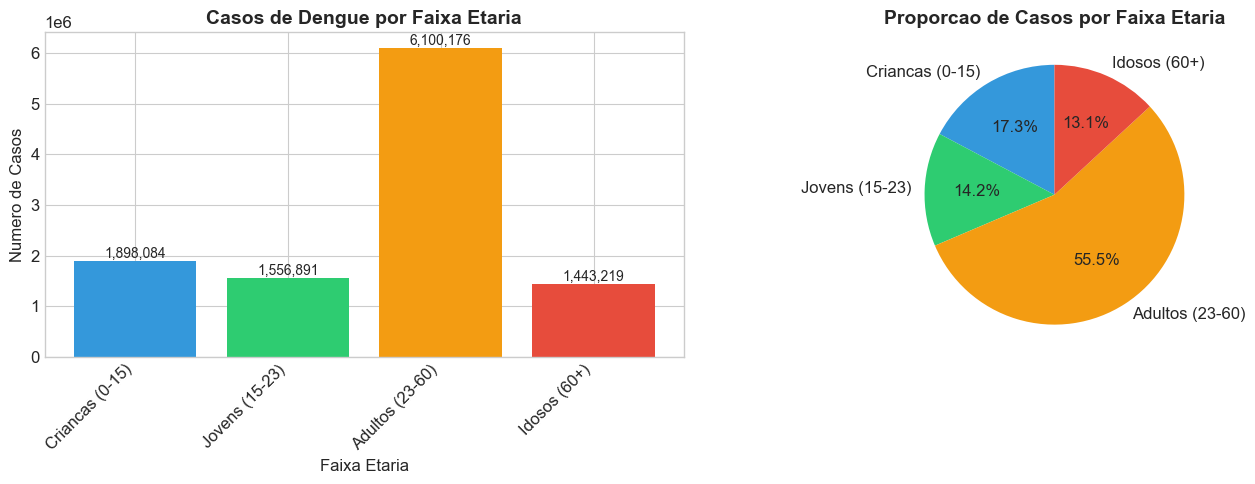


Total de casos analisados (excluindo 'Nao informado'): 10,998,370


In [16]:
# =============================================================================
# VISUALIZACAO DA DISTRIBUICAO POR FAIXA ETARIA
# =============================================================================

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Ordenar as faixas etarias (sem acentos para consistencia)
ordem_faixas = ['Criancas (0-15)', 'Jovens (15-23)', 'Adultos (23-60)', 'Idosos (60+)']
contagem_ordenada = df['FAIXA_ETARIA'].value_counts().reindex(
    [f for f in ordem_faixas if f in df['FAIXA_ETARIA'].value_counts().index]
)

# Cores para cada faixa
colors = ['#3498db', '#2ecc71', '#f39c12', '#e74c3c']

# Grafico de barras
bars = axes[0].bar(range(len(contagem_ordenada)), contagem_ordenada.values, color=colors[:len(contagem_ordenada)])
axes[0].set_xticks(range(len(contagem_ordenada)))
axes[0].set_xticklabels(contagem_ordenada.index, rotation=45, ha='right')
axes[0].set_title('Casos de Dengue por Faixa Etaria', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Faixa Etaria')
axes[0].set_ylabel('Numero de Casos')

# Adicionar valores nas barras
for i, v in enumerate(contagem_ordenada.values):
    axes[0].text(i, v + max(contagem_ordenada.values)*0.01, f'{v:,}', ha='center', fontsize=10)

# Grafico de pizza (excluindo "Nao informado")
contagem_sem_na = contagem_ordenada[contagem_ordenada.index != 'Nao informado']
axes[1].pie(contagem_sem_na.values, labels=contagem_sem_na.index, autopct='%1.1f%%', 
            colors=colors[:len(contagem_sem_na)], startangle=90)
axes[1].set_title('Proporcao de Casos por Faixa Etaria', fontsize=14, fontweight='bold')

plt.tight_layout()

# Salvar grafico
fig.savefig('GRAFICOS/01_casos_faixa_etaria.png', dpi=150, bbox_inches='tight', facecolor='white')
print("Grafico salvo em: GRAFICOS/01_casos_faixa_etaria.png")

plt.show()

print(f"\nTotal de casos analisados (excluindo 'Nao informado'): {contagem_sem_na.sum():,}")

## 4. Análise de Sintomas por Faixa Etária

Identificando os sintomas mais comuns em cada faixa etária

In [17]:
# Identificar colunas de sintomas (geralmente começam com FEBRE, DOR, NAUSEA, etc.)
# No SINAN, os sintomas geralmente são codificados como 1=Sim, 2=Não

# Possíveis colunas de sintomas no dataset de dengue
sintomas_possiveis = ['FEBRE', 'MIALGIA', 'CEFALEIA', 'EXANTEMA', 'VOMITO', 'NAUSEA', 
                      'DOR_COSTAS', 'CONJUNTVIT', 'ARTRITE', 'ARTRALGIA', 'PETEQUIA_N',
                      'LEUCOPENIA', 'LACO', 'DOR_RETRO', 'DIABETES', 'HEMATOLOG', 
                      'HEPATOPAT', 'RENAL', 'HIPERTENSA', 'ACIDO_PEPT', 'AUTO_IMUNE']

# Verificar quais colunas de sintomas existem no dataset
colunas_sintomas = [col for col in df.columns if col in sintomas_possiveis or 
                    any(sint in col.upper() for sint in ['FEBRE', 'DOR', 'VOMIT', 'NAUSEA', 'CEFALEIA'])]

print("Colunas de sintomas encontradas:")
print(colunas_sintomas)

# Se não encontrar as colunas padrão, buscar por padrões comuns
if not colunas_sintomas:
    colunas_sintomas = [col for col in df.columns if df[col].isin([1, 2]).sum() > len(df)*0.5][:15]
    print("\nColunas identificadas como possíveis sintomas (valores 1/2):")
    print(colunas_sintomas)

Colunas de sintomas encontradas:
['FEBRE', 'MIALGIA', 'CEFALEIA', 'EXANTEMA', 'VOMITO', 'NAUSEA', 'DOR_COSTAS', 'CONJUNTVIT', 'ARTRITE', 'ARTRALGIA', 'PETEQUIA_N', 'LEUCOPENIA', 'LACO', 'DOR_RETRO', 'DIABETES', 'HEMATOLOG', 'HEPATOPAT', 'RENAL', 'HIPERTENSA', 'ACIDO_PEPT', 'AUTO_IMUNE']


In [18]:
# =============================================================================
# ANALISAR SINTOMAS POR FAIXA ETARIA
# =============================================================================

df_valido = df[df['FAIXA_ETARIA'] != 'Nao informado'].copy()

traducao_sintomas = {
    'FEBRE': 'Febre', 'MIALGIA': 'Dor muscular', 'CEFALEIA': 'Dor de cabeca',
    'EXANTEMA': 'Manchas na pele', 'VOMITO': 'Vomito', 'NAUSEA': 'Nausea',
    'DOR_COSTAS': 'Dor nas costas', 'CONJUNTVIT': 'Conjuntivite', 'ARTRITE': 'Artrite',
    'ARTRALGIA': 'Dor nas articulacoes', 'PETEQUIA_N': 'Petequias', 'LEUCOPENIA': 'Leucopenia',
    'LACO': 'Prova do laco', 'DOR_RETRO': 'Dor retro-orbital', 'DIABETES': 'Diabetes',
    'HEMATOLOG': 'Doenca hematologica', 'HEPATOPAT': 'Hepatopatia', 'RENAL': 'Doenca renal',
    'HIPERTENSA': 'Hipertensao', 'ACIDO_PEPT': 'Doenca acido-peptica', 'AUTO_IMUNE': 'Doenca autoimune'
}

sintomas_por_faixa = {}
faixas = ['Criancas (0-15)', 'Jovens (15-23)', 'Adultos (23-60)', 'Idosos (60+)']

print(f"Analisando sintomas por faixa etaria...")
print(f"Total de registros validos: {len(df_valido):,}")

for faixa in faixas:
    df_faixa = df_valido[df_valido['FAIXA_ETARIA'] == faixa]
    print(f"  {faixa}: {len(df_faixa):,} registros")
    sintomas_faixa = {}
    
    for col in colunas_sintomas:
        if col in df.columns:
            total_com_sintoma = (df_faixa[col] == 1).sum()
            total_validos = df_faixa[col].isin([1, 2]).sum()
            
            if total_validos > 0:
                percentual = (total_com_sintoma / total_validos) * 100
                nome_sintoma = traducao_sintomas.get(col, col)
                sintomas_faixa[nome_sintoma] = percentual
    
    sintomas_por_faixa[faixa] = sintomas_faixa

df_sintomas = pd.DataFrame(sintomas_por_faixa).round(2)
print("\nFrequencia de Sintomas por Faixa Etaria (%):")
print("=" * 60)
df_sintomas

Analisando sintomas por faixa etaria...
Total de registros validos: 10,998,370
  Criancas (0-15): 1,898,084 registros
  Jovens (15-23): 1,556,891 registros
  Adultos (23-60): 6,100,176 registros
  Idosos (60+): 1,443,219 registros

Frequencia de Sintomas por Faixa Etaria (%):


,Criancas (0-15),Jovens (15-23),Adultos (23-60),Idosos (60+)
Febre,91.78,87.75,84.70,76.93
Dor muscular,65.85,82.29,83.39,79.13
Dor de cabeca,70.34,85.12,82.89,72.71
Manchas na pele,12.69,9.53,10.44,8.05
Vomito,32.89,28.62,24.65,24.20
Nausea,36.47,45.05,44.09,42.28
Dor nas costas,16.89,31.42,33.93,30.98
Conjuntivite,3.24,3.80,3.94,3.31
Artrite,5.53,9.19,11.05,10.57
Dor nas articulacoes,9.25,16.93,20.62,18.32


In [19]:
# Top 5 sintomas mais comuns por faixa etária
print("Top 5 Sintomas Mais Comuns por Faixa Etária:")
print("=" * 60)

for faixa in faixas:
    if faixa in df_sintomas.columns:
        top_10 = df_sintomas[faixa].dropna().sort_values(ascending=False).head(10)
        print(f"\n* {faixa}:")
        for i, (sintoma, percentual) in enumerate(top_10.items(), 1):
            print(f"   {i}. {sintoma}: {percentual:.1f}%")

Top 5 Sintomas Mais Comuns por Faixa Etária:

* Criancas (0-15):
   1. Febre: 91.8%
   2. Dor de cabeca: 70.3%
   3. Dor muscular: 65.8%
   4. Nausea: 36.5%
   5. Vomito: 32.9%
   6. Dor retro-orbital: 22.5%
   7. Dor nas costas: 16.9%
   8. Manchas na pele: 12.7%
   9. Dor nas articulacoes: 9.2%
   10. Petequias: 7.5%

* Jovens (15-23):
   1. Febre: 87.8%
   2. Dor de cabeca: 85.1%
   3. Dor muscular: 82.3%
   4. Nausea: 45.0%
   5. Dor retro-orbital: 36.9%
   6. Dor nas costas: 31.4%
   7. Vomito: 28.6%
   8. Dor nas articulacoes: 16.9%
   9. Manchas na pele: 9.5%
   10. Artrite: 9.2%

* Adultos (23-60):
   1. Febre: 84.7%
   2. Dor muscular: 83.4%
   3. Dor de cabeca: 82.9%
   4. Nausea: 44.1%
   5. Dor retro-orbital: 34.9%
   6. Dor nas costas: 33.9%
   7. Vomito: 24.6%
   8. Dor nas articulacoes: 20.6%
   9. Artrite: 11.1%
   10. Manchas na pele: 10.4%

* Idosos (60+):
   1. Dor muscular: 79.1%
   2. Febre: 76.9%
   3. Dor de cabeca: 72.7%
   4. Nausea: 42.3%
   5. Hipertensao: 33

Grafico salvo em: GRAFICOS/02_heatmap_sintomas.png


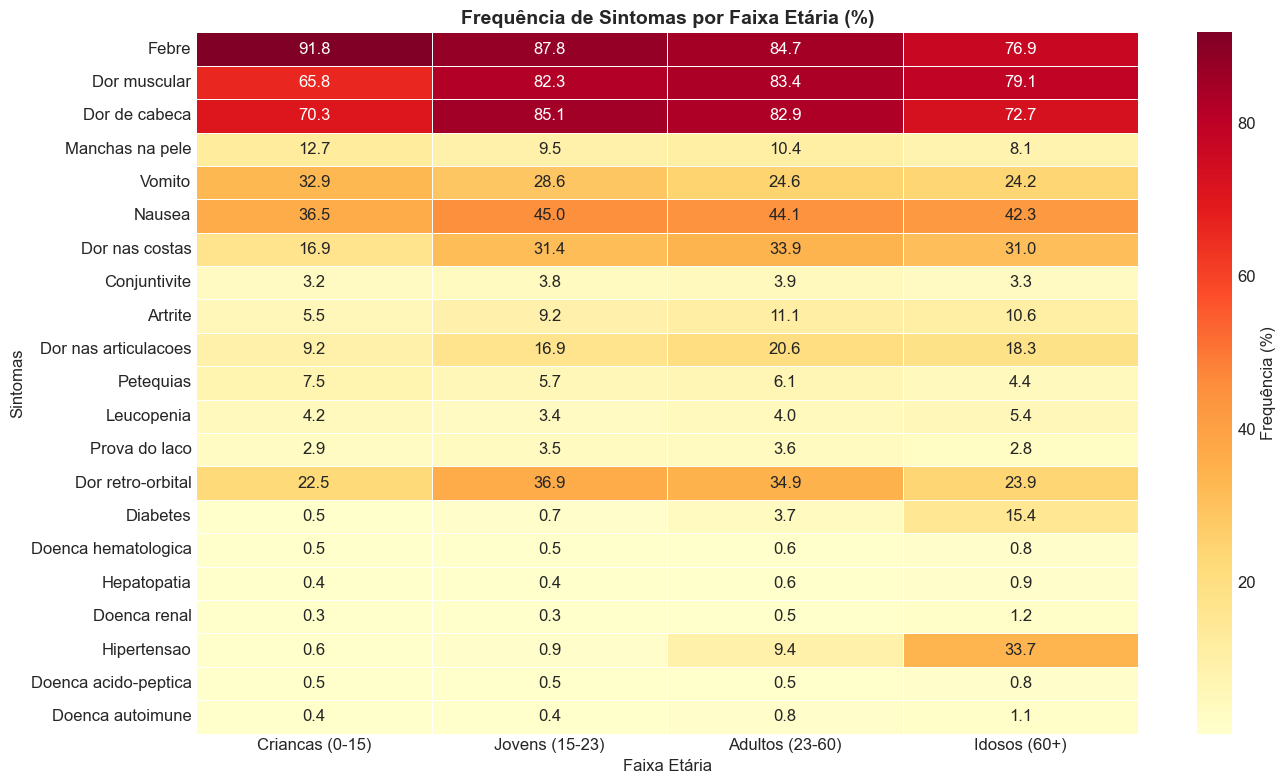

In [20]:
# Visualização: Heatmap de sintomas por faixa etária
if not df_sintomas.empty:
    fig = plt.figure(figsize=(14, 8))
    
    # Remover linhas com todos NaN
    df_heatmap = df_sintomas.dropna(how='all')
    
    if not df_heatmap.empty:
        sns.heatmap(df_heatmap, annot=True, fmt='.1f', cmap='YlOrRd', 
                    linewidths=0.5, cbar_kws={'label': 'Frequência (%)'})
        plt.title('Frequência de Sintomas por Faixa Etária (%)', fontsize=14, fontweight='bold')
        plt.xlabel('Faixa Etária')
        plt.ylabel('Sintomas')
        plt.tight_layout()
        
        # Salvar grafico
        fig.savefig('GRAFICOS/02_heatmap_sintomas.png', dpi=150, bbox_inches='tight', facecolor='white')
        print("Grafico salvo em: GRAFICOS/02_heatmap_sintomas.png")
        
        plt.show()
    else:
        print("Não há dados suficientes para gerar o heatmap de sintomas.")

## 5. Análise de Casos por Região e Faixa Etária

Identificando qual faixa etária é mais atingida em cada região do Brasil

In [21]:
# Identificar coluna de UF ou região
colunas_uf = [col for col in df.columns if 'UF' in col.upper() or 'ESTADO' in col.upper() or 'SG_UF' in col.upper()]
print("Colunas relacionadas a UF/Estado encontradas:")
print(colunas_uf)

# Verificar valores únicos
for col in colunas_uf[:3]:
    print(f"\nColuna {col} - Valores únicos: {df[col].nunique()}")
    print(df[col].value_counts().head(10))

Colunas relacionadas a UF/Estado encontradas:
['SG_UF_NOT', 'SG_UF', 'UF', 'COUFINF', 'GRAV_INSUF']

Coluna SG_UF_NOT - Valores únicos: 27
SG_UF_NOT
35    3775054
31    2321028
41    1124930
52     713820
42     590695
43     416510
53     405442
33     392667
29     347592
51     142083
Name: count, dtype: int64

Coluna SG_UF - Valores únicos: 27
SG_UF
35    3772498
31    2322163
41    1125267
52     717207
42     588167
43     416536
53     400285
33     392761
29     348726
51     142447
Name: count, dtype: int64

Coluna UF - Valores únicos: 27
UF
35.0    95934
31.0    40071
41.0    36975
52.0    27297
53.0    17933
29.0    14979
42.0    14034
33.0    13536
43.0    10727
51.0     9089
Name: count, dtype: int64


In [22]:
# Mapeamento de UF para regioes
uf_para_regiao = {
    11: 'Norte', 12: 'Norte', 13: 'Norte', 14: 'Norte', 15: 'Norte', 16: 'Norte', 17: 'Norte',
    21: 'Nordeste', 22: 'Nordeste', 23: 'Nordeste', 24: 'Nordeste', 25: 'Nordeste', 
    26: 'Nordeste', 27: 'Nordeste', 28: 'Nordeste', 29: 'Nordeste',
    31: 'Sudeste', 32: 'Sudeste', 33: 'Sudeste', 35: 'Sudeste',
    41: 'Sul', 42: 'Sul', 43: 'Sul',
    50: 'Centro-Oeste', 51: 'Centro-Oeste', 52: 'Centro-Oeste', 53: 'Centro-Oeste'
}

sigla_para_regiao = {
    'RO': 'Norte', 'AC': 'Norte', 'AM': 'Norte', 'RR': 'Norte', 'PA': 'Norte', 'AP': 'Norte', 'TO': 'Norte',
    'MA': 'Nordeste', 'PI': 'Nordeste', 'CE': 'Nordeste', 'RN': 'Nordeste', 'PB': 'Nordeste',
    'PE': 'Nordeste', 'AL': 'Nordeste', 'SE': 'Nordeste', 'BA': 'Nordeste',
    'MG': 'Sudeste', 'ES': 'Sudeste', 'RJ': 'Sudeste', 'SP': 'Sudeste',
    'PR': 'Sul', 'SC': 'Sul', 'RS': 'Sul',
    'MS': 'Centro-Oeste', 'MT': 'Centro-Oeste', 'GO': 'Centro-Oeste', 'DF': 'Centro-Oeste'
}

coluna_uf = None
for col in ['SG_UF_NOT', 'SG_UF', 'UF_NOT', 'UF']:
    if col in df.columns:
        coluna_uf = col
        break

if coluna_uf is None and colunas_uf:
    coluna_uf = colunas_uf[0]

print(f"Coluna de UF utilizada: {coluna_uf}")

if coluna_uf:
    # Converter para numerico antes de mapear (necessario pois a coluna foi convertida para category)
    uf_valores = pd.to_numeric(df[coluna_uf].astype(str), errors='coerce')
    
    # Verificar se sao codigos numericos ou siglas
    if uf_valores.notna().sum() > 0 and uf_valores.max() > 10:
        df['REGIAO'] = uf_valores.map(uf_para_regiao)
        print(f"Mapeamento usando codigos numericos de UF")
    else:
        df['REGIAO'] = df[coluna_uf].astype(str).map(sigla_para_regiao)
        print(f"Mapeamento usando siglas de UF")
    
    print("\nDistribuicao por Regiao:")
    print(df['REGIAO'].value_counts())

Coluna de UF utilizada: SG_UF_NOT
Mapeamento usando codigos numericos de UF

Distribuicao por Regiao:
REGIAO
Sudeste         6523802
Sul             2132135
Centro-Oeste    1365565
Nordeste         795264
Norte            181604
Name: count, dtype: int64


In [23]:
df_regiao_valido = df[(df['FAIXA_ETARIA'] != 'Nao informado') & (df['REGIAO'].notna())].copy()

tabela_regiao_faixa = pd.crosstab(df_regiao_valido['REGIAO'], df_regiao_valido['FAIXA_ETARIA'])

ordem_colunas = ['Criancas (0-15)', 'Jovens (15-23)', 'Adultos (23-60)', 'Idosos (60+)']
tabela_regiao_faixa = tabela_regiao_faixa[[col for col in ordem_colunas if col in tabela_regiao_faixa.columns]]

print("Numero de Casos por Regiao e Faixa Etaria:")
print("=" * 70)
tabela_regiao_faixa

Numero de Casos por Regiao e Faixa Etaria:


FAIXA_ETARIA,Criancas (0-15),Jovens (15-23),Adultos (23-60),Idosos (60+)
REGIAO,,,,
Centro-Oeste,260921,208245,745204,151195
Nordeste,196260,134424,403341,61239
Norte,43247,29811,94393,14153
Sudeste,1064618,894612,3663295,901277
Sul,333038,289799,1193943,315355


In [24]:
# Identificar a faixa etária mais atingida em cada região
print("Faixa Etária Mais Atingida por Região:")
print("=" * 60)

for regiao in tabela_regiao_faixa.index:
    faixa_mais_atingida = tabela_regiao_faixa.loc[regiao].idxmax()
    total_casos = tabela_regiao_faixa.loc[regiao].max()
    percentual = (total_casos / tabela_regiao_faixa.loc[regiao].sum()) * 100
    print(f"* {regiao}: {faixa_mais_atingida} ({total_casos:,} casos - {percentual:.1f}%)")

Faixa Etária Mais Atingida por Região:
* Centro-Oeste: Adultos (23-60) (745,204 casos - 54.6%)
* Nordeste: Adultos (23-60) (403,341 casos - 50.7%)
* Norte: Adultos (23-60) (94,393 casos - 52.0%)
* Sudeste: Adultos (23-60) (3,663,295 casos - 56.2%)
* Sul: Adultos (23-60) (1,193,943 casos - 56.0%)


Grafico salvo em: GRAFICOS/03_heatmap_regiao_faixa.png


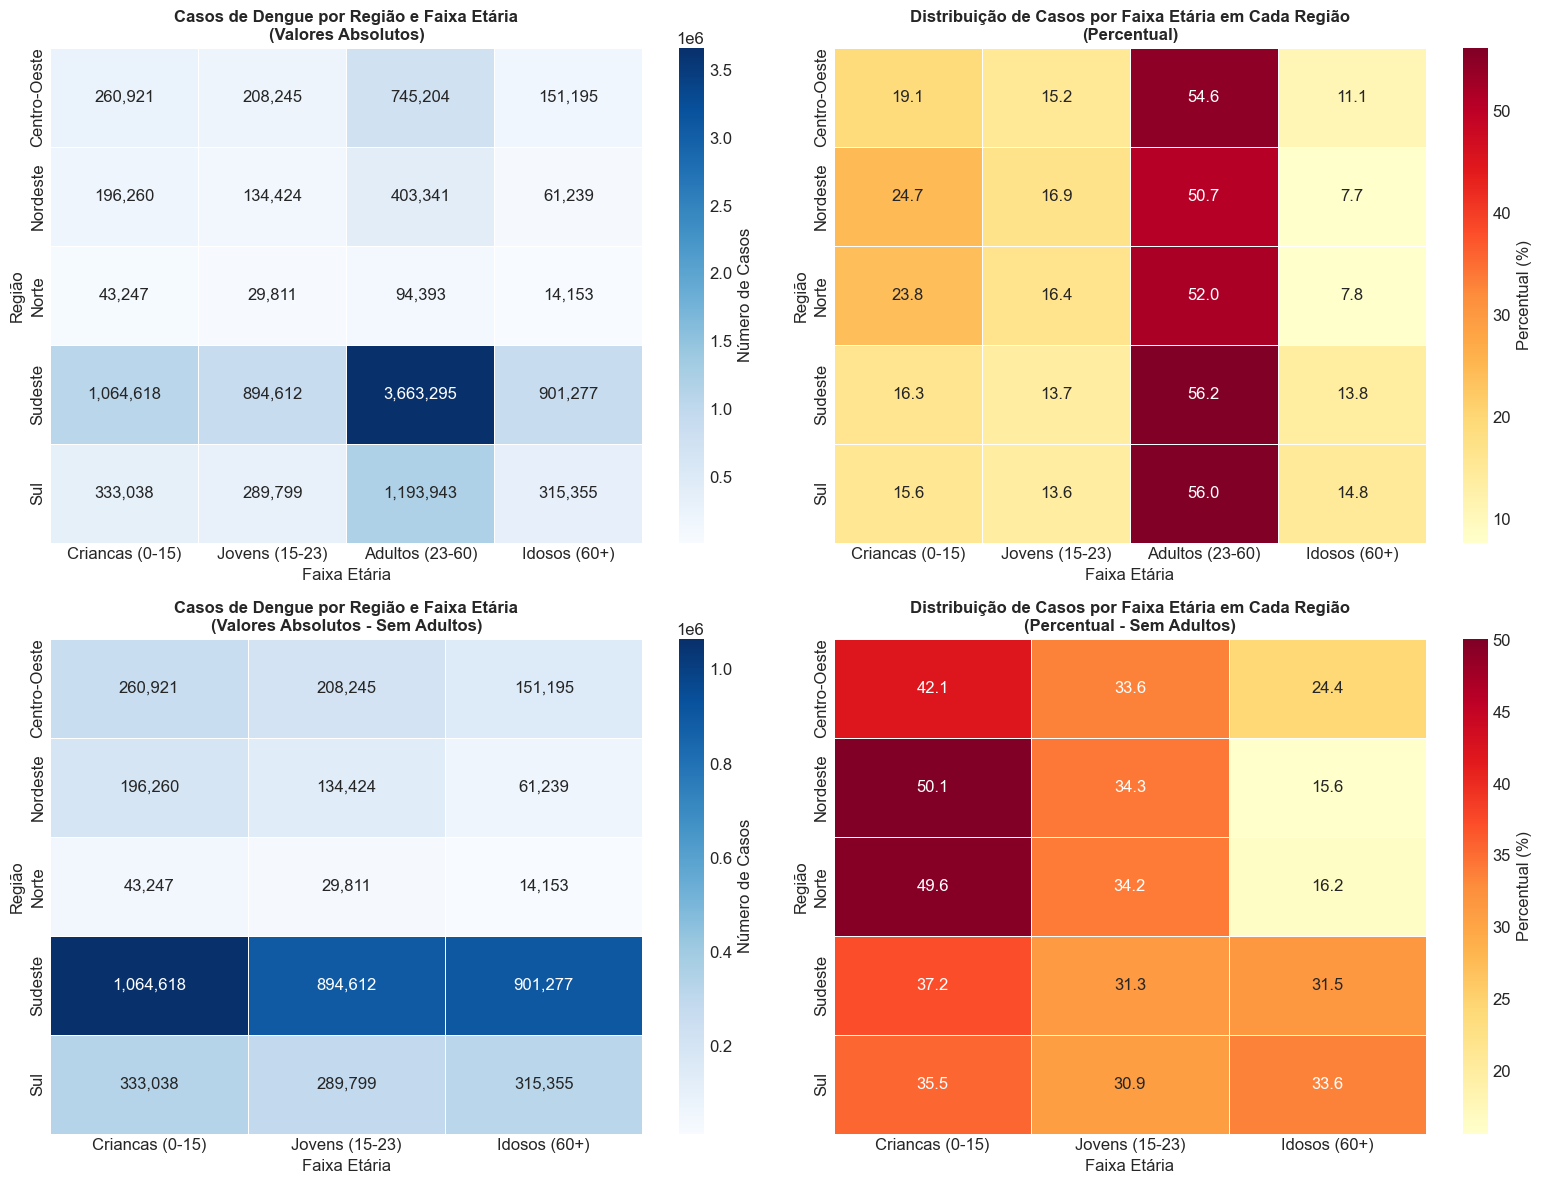

In [25]:
# Visualização: Heatmap de casos por região e faixa etária
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Heatmap com valores absolutos (todas as faixas)
sns.heatmap(tabela_regiao_faixa, annot=True, fmt=',d', cmap='Blues', 
            ax=axes[0, 0], linewidths=0.5, cbar_kws={'label': 'Número de Casos'})
axes[0, 0].set_title('Casos de Dengue por Região e Faixa Etária\n(Valores Absolutos)', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Faixa Etária')
axes[0, 0].set_ylabel('Região')

# Heatmap com percentuais (por região) - todas as faixas
tabela_percentual = tabela_regiao_faixa.div(tabela_regiao_faixa.sum(axis=1), axis=0) * 100
sns.heatmap(tabela_percentual, annot=True, fmt='.1f', cmap='YlOrRd', 
            ax=axes[0, 1], linewidths=0.5, cbar_kws={'label': 'Percentual (%)'})
axes[0, 1].set_title('Distribuição de Casos por Faixa Etária em Cada Região\n(Percentual)', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Faixa Etária')
axes[0, 1].set_ylabel('Região')

# Filtrar tabela excluindo adultos
colunas_sem_adultos = [col for col in tabela_regiao_faixa.columns if 'Adultos' not in col]
tabela_sem_adultos = tabela_regiao_faixa[colunas_sem_adultos]

# Heatmap com valores absolutos (sem adultos)
sns.heatmap(tabela_sem_adultos, annot=True, fmt=',d', cmap='Blues', 
            ax=axes[1, 0], linewidths=0.5, cbar_kws={'label': 'Número de Casos'})
axes[1, 0].set_title('Casos de Dengue por Região e Faixa Etária\n(Valores Absolutos - Sem Adultos)', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Faixa Etária')
axes[1, 0].set_ylabel('Região')

# Heatmap com percentuais (por região) - sem adultos
tabela_percentual_sem_adultos = tabela_sem_adultos.div(tabela_sem_adultos.sum(axis=1), axis=0) * 100
sns.heatmap(tabela_percentual_sem_adultos, annot=True, fmt='.1f', cmap='YlOrRd', 
            ax=axes[1, 1], linewidths=0.5, cbar_kws={'label': 'Percentual (%)'})
axes[1, 1].set_title('Distribuição de Casos por Faixa Etária em Cada Região\n(Percentual - Sem Adultos)', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Faixa Etária')
axes[1, 1].set_ylabel('Região')

plt.tight_layout()

# Salvar grafico
fig.savefig('GRAFICOS/03_heatmap_regiao_faixa.png', dpi=150, bbox_inches='tight', facecolor='white')
print("Grafico salvo em: GRAFICOS/03_heatmap_regiao_faixa.png")

plt.show()

Grafico salvo em: GRAFICOS/04_barras_regiao_faixa.png


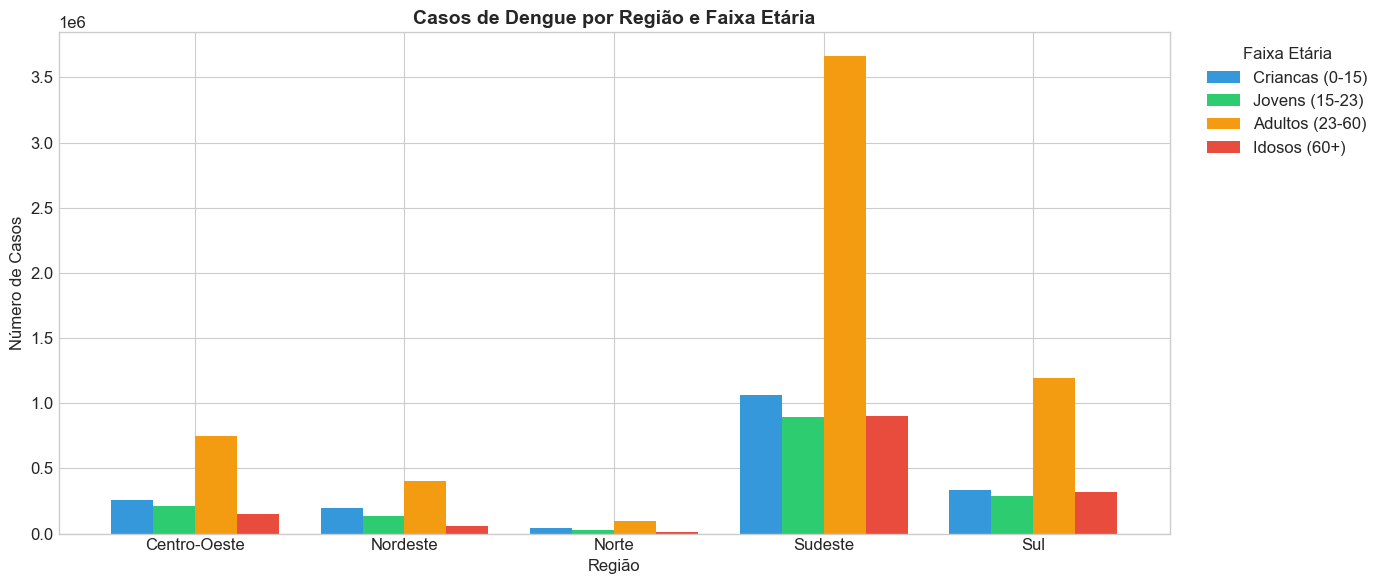

In [26]:
# Gráfico de barras agrupadas por região
fig, ax = plt.subplots(figsize=(14, 6))
tabela_regiao_faixa.plot(kind='bar', ax=ax, width=0.8, 
                          color=['#3498db', '#2ecc71', '#f39c12', '#e74c3c'])
plt.title('Casos de Dengue por Região e Faixa Etária', fontsize=14, fontweight='bold')
plt.xlabel('Região')
plt.ylabel('Número de Casos')
plt.legend(title='Faixa Etária', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()

# Salvar grafico
fig.savefig('GRAFICOS/04_barras_regiao_faixa.png', dpi=150, bbox_inches='tight', facecolor='white')
print("Grafico salvo em: GRAFICOS/04_barras_regiao_faixa.png")

plt.show()

## 6. Análise de Mortalidade por Faixa Etária

Identificando qual faixa etária teve mais óbitos por dengue no Brasil

In [27]:
# Identificar coluna de evolução/óbito
# No SINAN, geralmente a coluna EVOLUCAO indica o desfecho:
# 1 = Cura, 2 = Óbito pelo agravo, 3 = Óbito por outras causas, 9 = Ignorado

colunas_obito = [col for col in df.columns if 'EVOLU' in col.upper() or 'OBITO' in col.upper() or 'MORTE' in col.upper()]
print("Colunas relacionadas a evolução/óbito encontradas:")
print(colunas_obito)

# Verificar valores
for col in colunas_obito[:3]:
    print(f"\nColuna {col}:")
    print(df[col].value_counts())

Colunas relacionadas a evolução/óbito encontradas:
['EVOLUCAO', 'DT_OBITO']

Coluna EVOLUCAO:
EVOLUCAO
1.0    8915040
9.0     371074
2.0      10211
3.0       2487
4.0        697
Name: count, dtype: int64

Coluna DT_OBITO:
DT_OBITO
2024-03-30    88
2024-04-02    82
2024-03-16    82
2024-04-04    82
2024-04-15    82
              ..
2023-10-26     1
2025-07-22     1
2025-12-29     1
2025-12-22     1
2025-08-26     1
Name: count, Length: 1282, dtype: int64


In [28]:
coluna_evolucao = None
for col in ['EVOLUCAO', 'EVOLU', 'EVOLUCAO_CASO']:
    if col in df.columns:
        coluna_evolucao = col
        break

if coluna_evolucao is None and colunas_obito:
    coluna_evolucao = colunas_obito[0]

print(f"Coluna de evolucao utilizada: {coluna_evolucao}")

if coluna_evolucao:
    df['OBITO'] = df[coluna_evolucao].isin([2, 3])
    
    print(f"\nTotal de obitos registrados: {df['OBITO'].sum():,}")
    print(f"Taxa de mortalidade geral: {(df['OBITO'].sum() / len(df) * 100):.4f}%")

Coluna de evolucao utilizada: EVOLUCAO

Total de obitos registrados: 12,698
Taxa de mortalidade geral: 0.1155%


In [29]:
df_obitos = df[df['FAIXA_ETARIA'] != 'Nao informado'].copy()

obitos_por_faixa = df_obitos.groupby('FAIXA_ETARIA')['OBITO'].agg(['sum', 'count'])
obitos_por_faixa.columns = ['Total_Obitos', 'Total_Casos']
obitos_por_faixa['Taxa_Mortalidade_%'] = (obitos_por_faixa['Total_Obitos'] / obitos_por_faixa['Total_Casos'] * 100).round(4)

ordem = ['Criancas (0-15)', 'Jovens (15-23)', 'Adultos (23-60)', 'Idosos (60+)']
obitos_por_faixa = obitos_por_faixa.reindex([f for f in ordem if f in obitos_por_faixa.index])

print("Analise de Mortalidade por Faixa Etaria:")
print("=" * 70)
obitos_por_faixa

Analise de Mortalidade por Faixa Etaria:


,Total_Obitos,Total_Casos,Taxa_Mortalidade_%
FAIXA_ETARIA,,,
Criancas (0-15),534,1898084,0.0281
Jovens (15-23),394,1556891,0.0253
Adultos (23-60),3934,6100176,0.0645
Idosos (60+),7836,1443219,0.5430


In [30]:
# Identificar a faixa etária com mais óbitos
faixa_mais_obitos = obitos_por_faixa['Total_Obitos'].idxmax()
total_obitos_faixa = obitos_por_faixa['Total_Obitos'].max()
percentual_obitos = (total_obitos_faixa / obitos_por_faixa['Total_Obitos'].sum() * 100)

print("=" * 70)
print(f">>> FAIXA ETARIA COM MAIS OBITOS: {faixa_mais_obitos}")
print(f"   Total de obitos: {total_obitos_faixa:,}")
print(f"   Percentual do total de obitos: {percentual_obitos:.1f}%")
print("=" * 70)

# Faixa com maior taxa de mortalidade
faixa_maior_taxa = obitos_por_faixa['Taxa_Mortalidade_%'].idxmax()
maior_taxa = obitos_por_faixa['Taxa_Mortalidade_%'].max()

print(f"\n>>> FAIXA ETARIA COM MAIOR TAXA DE MORTALIDADE: {faixa_maior_taxa}")
print(f"   Taxa de mortalidade: {maior_taxa:.4f}%")

>>> FAIXA ETARIA COM MAIS OBITOS: Idosos (60+)
   Total de obitos: 7,836
   Percentual do total de obitos: 61.7%

>>> FAIXA ETARIA COM MAIOR TAXA DE MORTALIDADE: Idosos (60+)
   Taxa de mortalidade: 0.5430%


Grafico salvo em: GRAFICOS/05_mortalidade_faixa.png


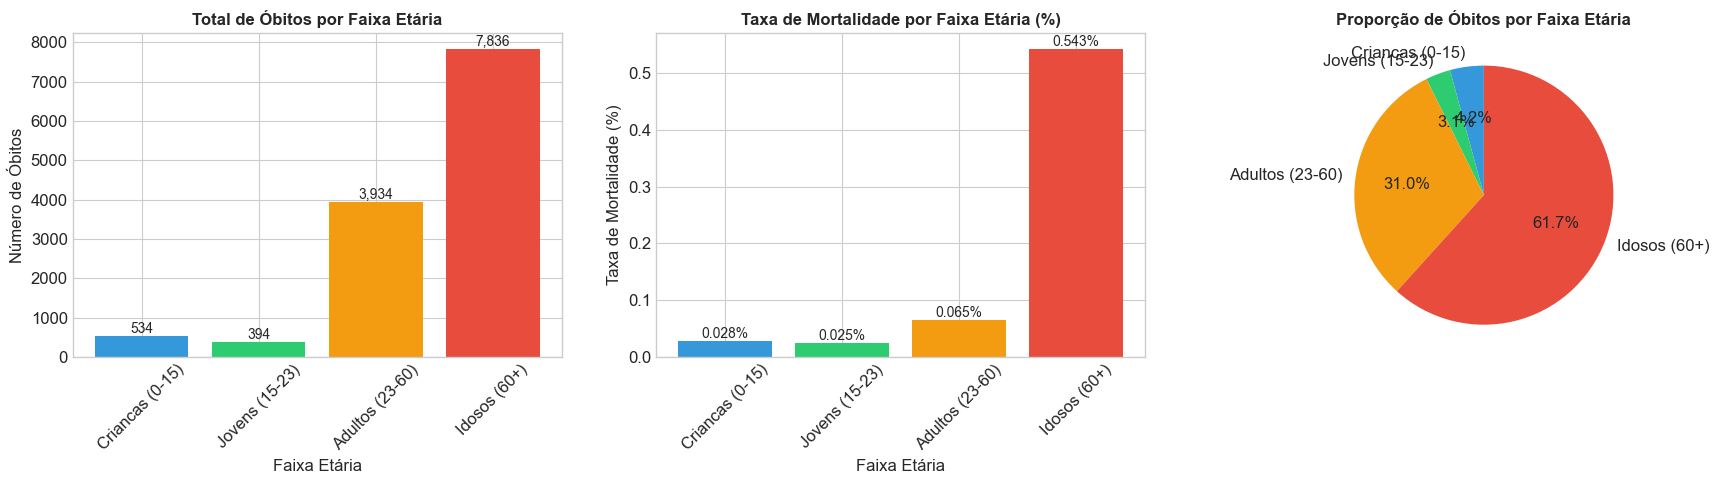

In [31]:
# Visualização de mortalidade
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

colors = ['#3498db', '#2ecc71', '#f39c12', '#e74c3c']

# Gráfico 1: Total de óbitos por faixa etária
axes[0].bar(obitos_por_faixa.index, obitos_por_faixa['Total_Obitos'], color=colors)
axes[0].set_title('Total de Óbitos por Faixa Etária', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Faixa Etária')
axes[0].set_ylabel('Número de Óbitos')
axes[0].tick_params(axis='x', rotation=45)
for i, v in enumerate(obitos_por_faixa['Total_Obitos']):
    axes[0].text(i, v + max(obitos_por_faixa['Total_Obitos'])*0.01, f'{v:,}', ha='center', fontsize=10)

# Gráfico 2: Taxa de mortalidade por faixa etária
axes[1].bar(obitos_por_faixa.index, obitos_por_faixa['Taxa_Mortalidade_%'], color=colors)
axes[1].set_title('Taxa de Mortalidade por Faixa Etária (%)', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Faixa Etária')
axes[1].set_ylabel('Taxa de Mortalidade (%)')
axes[1].tick_params(axis='x', rotation=45)
for i, v in enumerate(obitos_por_faixa['Taxa_Mortalidade_%']):
    axes[1].text(i, v + max(obitos_por_faixa['Taxa_Mortalidade_%'])*0.01, f'{v:.3f}%', ha='center', fontsize=10)

# Gráfico 3: Proporção de óbitos
axes[2].pie(obitos_por_faixa['Total_Obitos'], labels=obitos_por_faixa.index, 
            autopct='%1.1f%%', colors=colors, startangle=90)
axes[2].set_title('Proporção de Óbitos por Faixa Etária', fontsize=12, fontweight='bold')

plt.tight_layout()

# Salvar grafico
fig.savefig('GRAFICOS/05_mortalidade_faixa.png', dpi=150, bbox_inches='tight', facecolor='white')
print("Grafico salvo em: GRAFICOS/05_mortalidade_faixa.png")

plt.show()

## 7. Resumo Final da Análise

In [32]:
# Resumo completo da analise
print("=" * 80)
print("                    RESUMO DA ANALISE DE DENGUE NO BRASIL")
print("=" * 80)

print(f"\n[DATASET]")
print(f"   - Total de registros: {len(df):,}")
print(f"   - Periodo: 2025")

print(f"\n[DISTRIBUICAO POR FAIXA ETARIA]")
for faixa in ['Criancas (0-15)', 'Jovens (15-23)', 'Adultos (23-60)', 'Idosos (60+)']:
    if faixa in contagem_faixa.index:
        casos = contagem_faixa[faixa]
        pct = (casos / contagem_faixa.sum() * 100)
        print(f"   - {faixa}: {casos:,} casos ({pct:.1f}%)")

print(f"\n[SINTOMAS MAIS COMUNS POR FAIXA ETARIA]")
faixas_resumo = ['Criancas (0-15)', 'Jovens (15-23)', 'Adultos (23-60)', 'Idosos (60+)']
for faixa in faixas_resumo:
    if faixa in df_sintomas.columns and not df_sintomas[faixa].dropna().empty:
        top_sintoma = df_sintomas[faixa].dropna().idxmax()
        pct = df_sintomas[faixa].max()
        print(f"   - {faixa}: {top_sintoma} ({pct:.1f}%)")
    else:
        print(f"   - {faixa}: Dados nao disponiveis")

print(f"\n[FAIXA ETARIA MAIS ATINGIDA POR REGIAO]")
for regiao in tabela_regiao_faixa.index:
    faixa = tabela_regiao_faixa.loc[regiao].idxmax()
    casos = tabela_regiao_faixa.loc[regiao].max()
    print(f"   - {regiao}: {faixa} ({casos:,} casos)")

print(f"\n[MORTALIDADE]")
print(f"   - Total de obitos: {obitos_por_faixa['Total_Obitos'].sum():,}")
print(f"   - Faixa com mais obitos: {faixa_mais_obitos} ({total_obitos_faixa:,} obitos)")
print(f"   - Faixa com maior taxa de mortalidade: {faixa_maior_taxa} ({maior_taxa:.4f}%)")

print("\n" + "=" * 80)

                    RESUMO DA ANALISE DE DENGUE NO BRASIL

[DATASET]
   - Total de registros: 10,998,370
   - Periodo: 2025

[DISTRIBUICAO POR FAIXA ETARIA]
   - Criancas (0-15): 1,898,084 casos (17.3%)
   - Jovens (15-23): 1,556,891 casos (14.2%)
   - Adultos (23-60): 6,100,176 casos (55.5%)
   - Idosos (60+): 1,443,219 casos (13.1%)

[SINTOMAS MAIS COMUNS POR FAIXA ETARIA]
   - Criancas (0-15): Febre (91.8%)
   - Jovens (15-23): Febre (87.8%)
   - Adultos (23-60): Febre (84.7%)
   - Idosos (60+): Dor muscular (79.1%)

[FAIXA ETARIA MAIS ATINGIDA POR REGIAO]
   - Centro-Oeste: Adultos (23-60) (745,204 casos)
   - Nordeste: Adultos (23-60) (403,341 casos)
   - Norte: Adultos (23-60) (94,393 casos)
   - Sudeste: Adultos (23-60) (3,663,295 casos)
   - Sul: Adultos (23-60) (1,193,943 casos)

[MORTALIDADE]
   - Total de obitos: 12,698
   - Faixa com mais obitos: Idosos (60+) (7,836 obitos)
   - Faixa com maior taxa de mortalidade: Idosos (60+) (0.5430%)



Grafico salvo em: GRAFICOS/06_dashboard_final.png


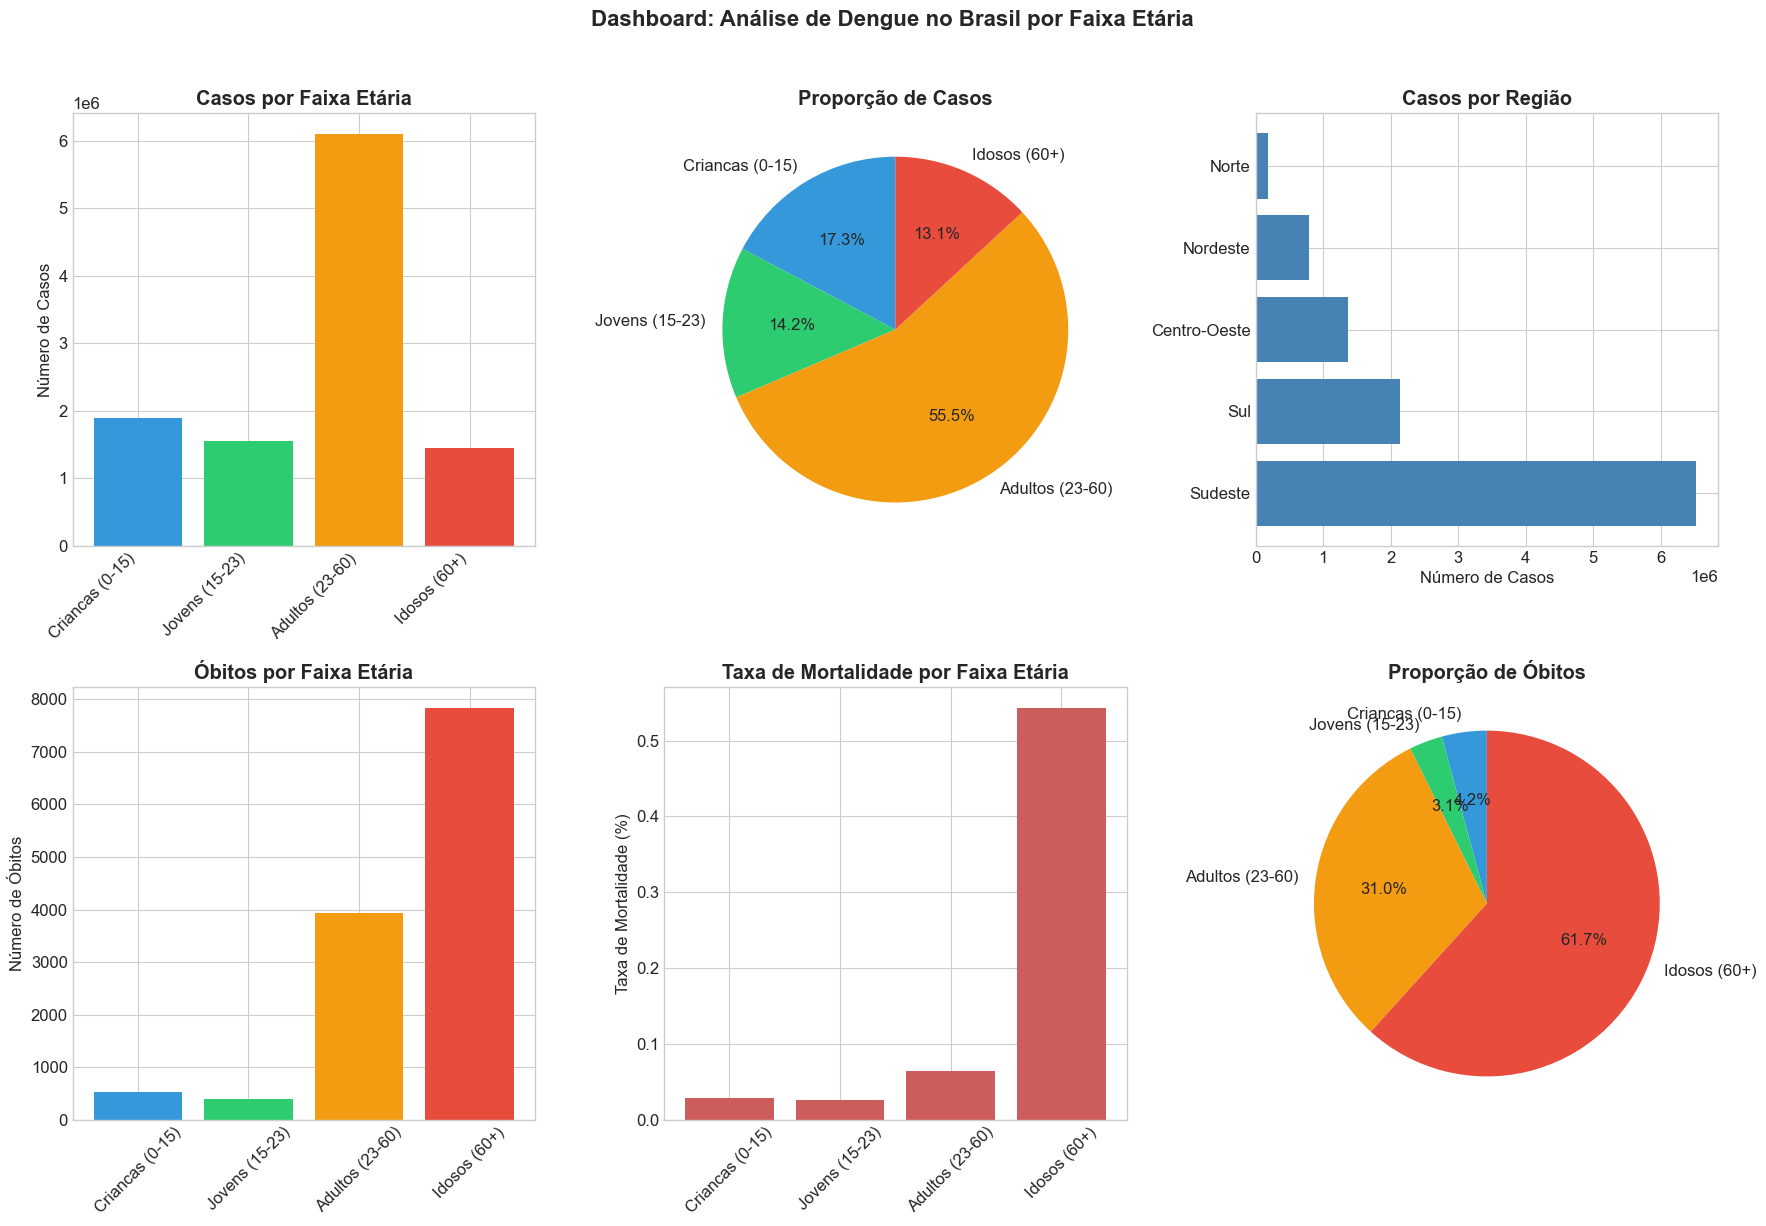

In [33]:
# Dashboard final com todos os principais graficos
fig = plt.figure(figsize=(18, 12))

# 1. Casos por faixa etaria
ax1 = fig.add_subplot(2, 3, 1)
contagem_ordenada = df['FAIXA_ETARIA'].value_counts().reindex(
    [f for f in ordem_faixas if f in df['FAIXA_ETARIA'].value_counts().index and f != 'Nao informado'])
ax1.bar(range(len(contagem_ordenada)), contagem_ordenada.values, color=colors[:len(contagem_ordenada)])
ax1.set_xticks(range(len(contagem_ordenada)))
ax1.set_xticklabels(contagem_ordenada.index, rotation=45, ha='right')
ax1.set_title('Casos por Faixa Etária', fontweight='bold')
ax1.set_ylabel('Número de Casos')

# 2. Proporção de casos
ax2 = fig.add_subplot(2, 3, 2)
ax2.pie(contagem_ordenada.values, labels=contagem_ordenada.index, autopct='%1.1f%%', 
        colors=colors[:len(contagem_ordenada)], startangle=90)
ax2.set_title('Proporção de Casos', fontweight='bold')

# 3. Casos por região
ax3 = fig.add_subplot(2, 3, 3)
casos_regiao = df['REGIAO'].value_counts()
ax3.barh(casos_regiao.index, casos_regiao.values, color='steelblue')
ax3.set_title('Casos por Região', fontweight='bold')
ax3.set_xlabel('Número de Casos')

# 4. Óbitos por faixa etária
ax4 = fig.add_subplot(2, 3, 4)
ax4.bar(obitos_por_faixa.index, obitos_por_faixa['Total_Obitos'], color=colors)
ax4.set_title('Óbitos por Faixa Etária', fontweight='bold')
ax4.set_ylabel('Número de Óbitos')
ax4.tick_params(axis='x', rotation=45)

# 5. Taxa de mortalidade
ax5 = fig.add_subplot(2, 3, 5)
ax5.bar(obitos_por_faixa.index, obitos_por_faixa['Taxa_Mortalidade_%'], color='indianred')
ax5.set_title('Taxa de Mortalidade por Faixa Etária', fontweight='bold')
ax5.set_ylabel('Taxa de Mortalidade (%)')
ax5.tick_params(axis='x', rotation=45)

# 6. Proporção de óbitos
ax6 = fig.add_subplot(2, 3, 6)
ax6.pie(obitos_por_faixa['Total_Obitos'], labels=obitos_por_faixa.index, 
        autopct='%1.1f%%', colors=colors, startangle=90)
ax6.set_title('Proporção de Óbitos', fontweight='bold')

plt.suptitle('Dashboard: Análise de Dengue no Brasil por Faixa Etária', 
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()

# Salvar grafico
fig.savefig('GRAFICOS/06_dashboard_final.png', dpi=150, bbox_inches='tight', facecolor='white')
print("Grafico salvo em: GRAFICOS/06_dashboard_final.png")

plt.show()

## 8. Análise Geográfica por Estado

Mapa com a distribuição de casos por Unidade Federativa (UF)

In [35]:
# =============================================================================
# MAPEAMENTO DE CODIGOS DE UF PARA NOMES (IBGE)
# =============================================================================

import warnings
warnings.filterwarnings('ignore')

# Dicionario de UF (codigos IBGE -> siglas e nomes)
uf_info = {
    11: {'sigla': 'RO', 'nome': 'Rondonia'},
    12: {'sigla': 'AC', 'nome': 'Acre'},
    13: {'sigla': 'AM', 'nome': 'Amazonas'},
    14: {'sigla': 'RR', 'nome': 'Roraima'},
    15: {'sigla': 'PA', 'nome': 'Para'},
    16: {'sigla': 'AP', 'nome': 'Amapa'},
    17: {'sigla': 'TO', 'nome': 'Tocantins'},
    21: {'sigla': 'MA', 'nome': 'Maranhao'},
    22: {'sigla': 'PI', 'nome': 'Piaui'},
    23: {'sigla': 'CE', 'nome': 'Ceara'},
    24: {'sigla': 'RN', 'nome': 'Rio Grande do Norte'},
    25: {'sigla': 'PB', 'nome': 'Paraiba'},
    26: {'sigla': 'PE', 'nome': 'Pernambuco'},
    27: {'sigla': 'AL', 'nome': 'Alagoas'},
    28: {'sigla': 'SE', 'nome': 'Sergipe'},
    29: {'sigla': 'BA', 'nome': 'Bahia'},
    31: {'sigla': 'MG', 'nome': 'Minas Gerais'},
    32: {'sigla': 'ES', 'nome': 'Espirito Santo'},
    33: {'sigla': 'RJ', 'nome': 'Rio de Janeiro'},
    35: {'sigla': 'SP', 'nome': 'Sao Paulo'},
    41: {'sigla': 'PR', 'nome': 'Parana'},
    42: {'sigla': 'SC', 'nome': 'Santa Catarina'},
    43: {'sigla': 'RS', 'nome': 'Rio Grande do Sul'},
    50: {'sigla': 'MS', 'nome': 'Mato Grosso do Sul'},
    51: {'sigla': 'MT', 'nome': 'Mato Grosso'},
    52: {'sigla': 'GO', 'nome': 'Goias'},
    53: {'sigla': 'DF', 'nome': 'Distrito Federal'}
}

# Criar dicionarios separados
uf_codigo_para_sigla = {k: v['sigla'] for k, v in uf_info.items()}
uf_codigo_para_nome = {k: v['nome'] for k, v in uf_info.items()}

# Mapear para o DataFrame
df['SIGLA_UF'] = df['SG_UF_NOT'].map(uf_codigo_para_sigla)
df['NOME_UF'] = df['SG_UF_NOT'].map(uf_codigo_para_nome)

print("Mapeamento de UF aplicado!")
print(f"  - Total de registros: {len(df):,}")
print(f"  - Registros com UF identificada: {df['NOME_UF'].notna().sum():,}")

print("\nDistribuicao por UF (Top 10):")
print(df['SIGLA_UF'].value_counts().head(10))

Mapeamento de UF aplicado!
  - Total de registros: 10,998,370
  - Registros com UF identificada: 10,998,370

Distribuicao por UF (Top 10):
SIGLA_UF
SP    3775054
MG    2321028
PR    1124930
GO     713820
SC     590695
RS     416510
DF     405442
RJ     392667
BA     347592
MT     142083
Name: count, dtype: int64


In [36]:
# =============================================================================
# VERIFICACAO DO MAPEAMENTO DE UF
# =============================================================================

print("Verificacao do mapeamento de UFs:")
print(f"  - Total de registros: {len(df):,}")
print(f"  - Registros com UF identificada: {df['NOME_UF'].notna().sum():,}")
print(f"  - Registros sem UF: {df['NOME_UF'].isna().sum():,}")

print("\nAmostra dos dados mapeados:")
print(df[['SG_UF_NOT', 'SIGLA_UF', 'NOME_UF', 'ID_MUNICIP']].head(10))

Verificacao do mapeamento de UFs:
  - Total de registros: 10,998,370
  - Registros com UF identificada: 10,998,370
  - Registros sem UF: 0

Amostra dos dados mapeados:
  SG_UF_NOT SIGLA_UF NOME_UF ID_MUNICIP
0        12       AC    Acre     120020
1        12       AC    Acre     120020
2        12       AC    Acre     120020
3        12       AC    Acre     120020
4        12       AC    Acre     120020
5        12       AC    Acre     120020
6        12       AC    Acre     120020
7        12       AC    Acre     120020
8        12       AC    Acre     120020
9        12       AC    Acre     120020


In [37]:
# =============================================================================
# ANALISE DE CASOS POR ESTADO
# =============================================================================

# Contar casos por estado
# ADICIONADO: observed=True para evitar o produto cartesiano de categorias
casos_por_estado = df.groupby(['SG_UF_NOT', 'NOME_UF'], observed=True).size().reset_index(name='CASOS')
casos_por_estado = casos_por_estado.sort_values('CASOS', ascending=False)

# Adicionar ranking
casos_por_estado['RANKING'] = range(1, len(casos_por_estado) + 1)

# Calcular percentual
casos_por_estado['PERCENTUAL'] = (casos_por_estado['CASOS'] / casos_por_estado['CASOS'].sum() * 100).round(2)

print("Casos de Dengue por Estado (UF):")
print("=" * 70)
print(casos_por_estado.to_string(index=False))

print(f"\n\nTop 5 Estados mais atingidos:")
for _, row in casos_por_estado.head(5).iterrows():
    print(f"  {row['RANKING']}. {row['NOME_UF']}: {row['CASOS']:,} casos ({row['PERCENTUAL']:.1f}%)")

Casos de Dengue por Estado (UF):
SG_UF_NOT             NOME_UF   CASOS  RANKING  PERCENTUAL
       35           Sao Paulo 3775054        1       34.32
       31        Minas Gerais 2321028        2       21.10
       41              Parana 1124930        3       10.23
       52               Goias  713820        4        6.49
       42      Santa Catarina  590695        5        5.37
       43   Rio Grande do Sul  416510        6        3.79
       53    Distrito Federal  405442        7        3.69
       33      Rio de Janeiro  392667        8        3.57
       29               Bahia  347592        9        3.16
       51         Mato Grosso  142083       10        1.29
       50  Mato Grosso do Sul  104220       11        0.95
       24 Rio Grande do Norte   76945       12        0.70
       23               Ceara   75704       13        0.69
       26          Pernambuco   69224       14        0.63
       27             Alagoas   64498       15        0.59
       22              

In [39]:
# =============================================================================
# TOP 20 MUNICIPIOS COM MAIS CASOS (por codigo do municipio)
# =============================================================================

# Como nao temos arquivo de nomes de municipios, vamos analisar por codigo
casos_por_municipio = df.groupby(['ID_MUNICIP', 'SIGLA_UF'], observed=True).size().reset_index(name='CASOS')
casos_por_municipio = casos_por_municipio.sort_values('CASOS', ascending=False)

# Calcular percentual
casos_por_municipio['PERCENTUAL'] = (casos_por_municipio['CASOS'] / casos_por_municipio['CASOS'].sum() * 100).round(2)

print("Top 20 Municipios com mais casos de Dengue:")
print("=" * 60)
top_20 = casos_por_municipio.head(20)
print(top_20.to_string(index=False))

Top 20 Municipios com mais casos de Dengue:
ID_MUNICIP SIGLA_UF  CASOS  PERCENTUAL
    355030       SP 759702        6.91
    530010       DF 405442        3.69
    310620       MG 280046        2.55
    350950       SP 203893        1.85
    520870       GO 173552        1.58
    420910       SC 152454        1.39
    330455       RJ 148407        1.35
    354980       SP 140311        1.28
    354990       SP 111308        1.01
    411370       PR 109099        0.99
    431490       RS  99318        0.90
    354340       SP  92098        0.84
    317020       MG  87538        0.80
    354140       SP  80368        0.73
    311860       MG  80151        0.73
    520140       GO  79697        0.72
    351880       SP  75697        0.69
    355220       SP  74547        0.68
    420240       SC  73867        0.67
    420540       SC  70221        0.64


## 9. Evolução Temporal dos Casos por Semana Epidemiológica

Gráfico combinado (Combo Chart) mostrando:
- **Barras**: Total de casos por semana
- **Linhas**: Evolução por faixa etária

In [40]:
# =============================================================================
# PREPARAÇÃO DOS DADOS PARA O GRÁFICO TEMPORAL
# =============================================================================

import matplotlib.ticker as ticker

# Filtrar dados válidos (com data e faixa etária)
df_temporal = df[(df['DT_NOTIFIC'].notna()) & (df['FAIXA_ETARIA'] != 'Nao informado')].copy()

# Criar coluna de semana epidemiológica (início da semana)
df_temporal['SEMANA'] = df_temporal['DT_NOTIFIC'].dt.to_period('W').apply(lambda r: r.start_time)

print(f"Total de registros para análise temporal: {len(df_temporal):,}")
print(f"Período: {df_temporal['SEMANA'].min().strftime('%d/%m/%Y')} até {df_temporal['SEMANA'].max().strftime('%d/%m/%Y')}")

# Agregação 1: Total de casos por semana (para as Barras)
total_por_semana = df_temporal.groupby('SEMANA').size().reset_index(name='TOTAL_CASOS')

# Agregação 2: Casos por semana E faixa etária (para as Linhas)
faixa_por_semana = df_temporal.groupby(['SEMANA', 'FAIXA_ETARIA'], observed=True).size().unstack(fill_value=0).reset_index()

# Merge final para plotagem
chart_data = total_por_semana.merge(faixa_por_semana, on='SEMANA')
chart_data.sort_values('SEMANA', inplace=True)

print(f"\nTotal de semanas epidemiológicas: {len(chart_data)}")
print(f"\nPrimeiras linhas dos dados agregados:")
chart_data.head()

Total de registros para análise temporal: 10,998,370
Período: 27/12/2021 até 05/01/2026

Total de semanas epidemiológicas: 211

Primeiras linhas dos dados agregados:


,SEMANA,TOTAL_CASOS,Criancas (0-15),Jovens (15-23),Adultos (23-60),Idosos (60+)
0,2021-12-27,136,28,28,66,14
1,2022-01-03,6400,1190,1082,3623,505
2,2022-01-10,9734,1799,1427,5672,836
3,2022-01-17,11168,2208,1552,6388,1020
4,2022-01-24,12427,2497,1707,6985,1238


Grafico salvo em: GRAFICOS/07_evolucao_temporal.png


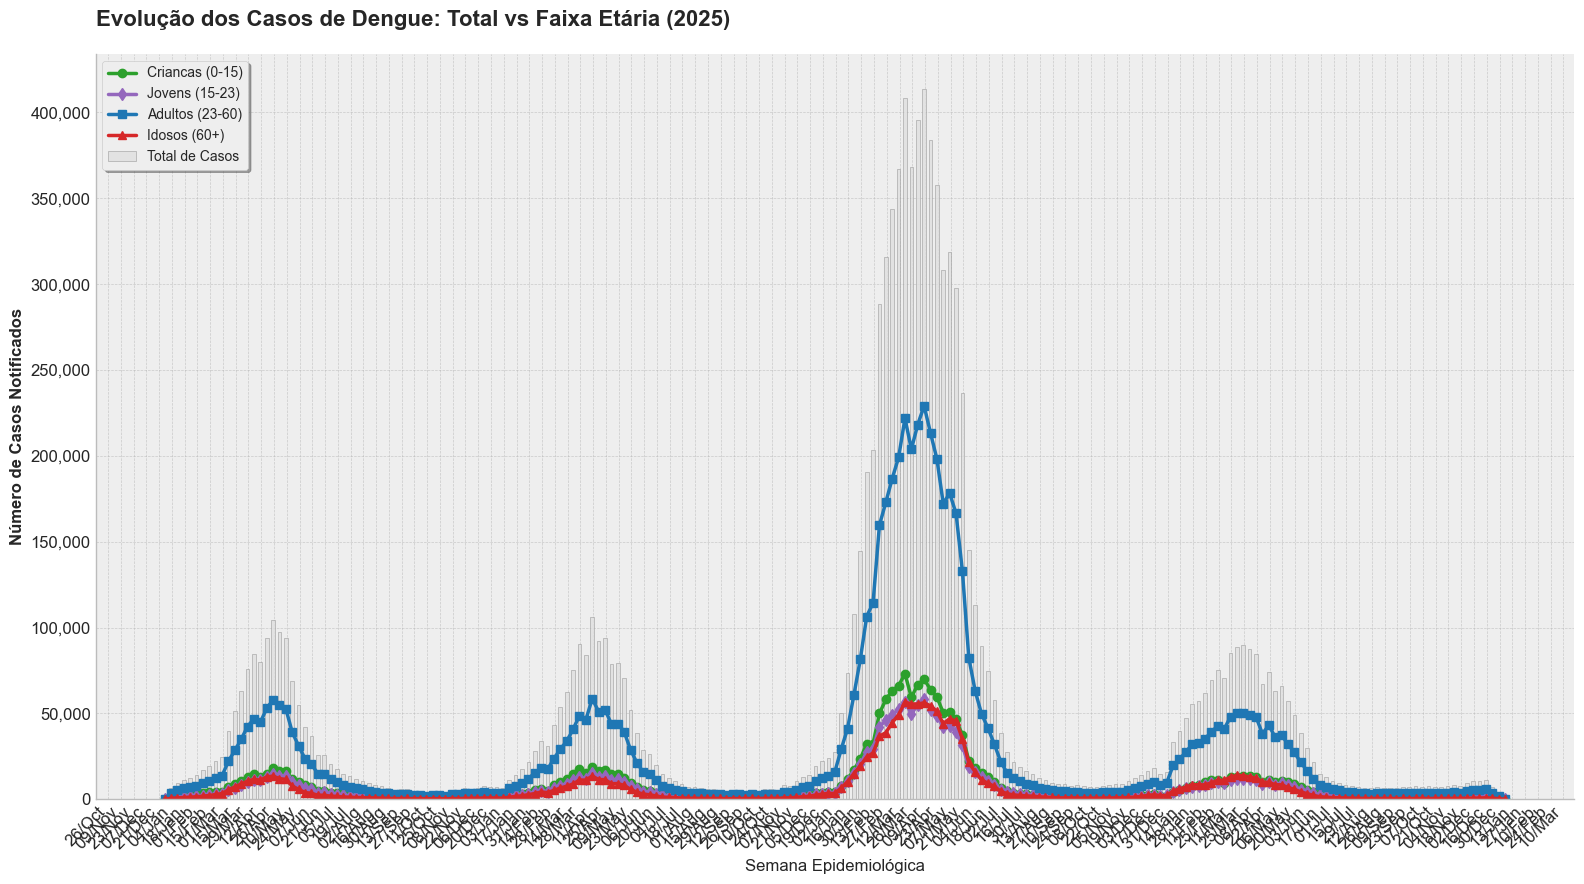


RESUMO POR FAIXA ETÁRIA (MÉDIA SEMANAL)
  Adultos (23-60)          : 28,910.8 casos/semana
  Criancas (0-15)          : 8,995.7 casos/semana
  Jovens (15-23)           : 7,378.6 casos/semana
  Idosos (60+)             : 6,839.9 casos/semana

Média total semanal: 52,125.0 casos
Pico máximo: 413,376 casos (Semana de 08/04/2024)


In [41]:
# =============================================================================
# VISUALIZAÇÃO: COMBO CHART (BARRAS + LINHAS)
# =============================================================================

# Configuração do estilo 'Clean'
plt.style.use('bmh') 
fig, ax1 = plt.subplots(figsize=(16, 9))

# Definir as faixas etárias na ordem correta
faixas_labels = ['Criancas (0-15)', 'Jovens (15-23)', 'Adultos (23-60)', 'Idosos (60+)']
faixas_disponiveis = [f for f in faixas_labels if f in chart_data.columns]

# 1. Plot das Barras (Total de Casos)
bar_width = 4  # Largura em dias (ajuste visual)
bars = ax1.bar(
    chart_data['SEMANA'], 
    chart_data['TOTAL_CASOS'], 
    width=bar_width, 
    color='#e0e0e0', 
    edgecolor='#999999',
    label='Total de Casos', 
    alpha=0.8,
    zorder=1
)

# 2. Plot das Linhas (Faixas Etárias)
# Definição de cores e marcadores para distinção clara
line_styles = {
    'Criancas (0-15)': {'color': '#2ca02c', 'marker': 'o'},
    'Jovens (15-23)': {'color': '#9467bd', 'marker': 'd'},
    'Adultos (23-60)': {'color': '#1f77b4', 'marker': 's'},
    'Idosos (60+)': {'color': '#d62728', 'marker': '^'}
}

# Loop para plotar cada faixa etária
for col in faixas_disponiveis:
    ax1.plot(
        chart_data['SEMANA'], 
        chart_data[col], 
        label=col,
        color=line_styles[col]['color'],
        marker=line_styles[col]['marker'],
        linewidth=2.5,
        markersize=6,
        zorder=2
    )

# =============================================================================
# FORMATAÇÃO E ESTÉTICA
# =============================================================================

# Títulos e Labels
ax1.set_title('Evolução dos Casos de Dengue: Total vs Faixa Etária (2025)', 
             fontsize=16, fontweight='bold', pad=20, loc='left')
ax1.set_ylabel('Número de Casos Notificados', fontsize=12, fontweight='bold')
ax1.set_xlabel('Semana Epidemiológica', fontsize=12)

# Formatação do Eixo X (Datas)
ax1.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%d/%b'))
ax1.xaxis.set_major_locator(plt.matplotlib.dates.WeekdayLocator(interval=2))
plt.xticks(rotation=45, ha='right')

# Formatação do Eixo Y (Milhares se necessário)
ax1.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Legenda Unificada
ax1.legend(loc='upper left', frameon=True, fancybox=True, shadow=True, ncol=1, fontsize=10)

# Grid e Layout
ax1.grid(True, linestyle='--', alpha=0.6)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

plt.tight_layout()

# Salvar grafico
fig.savefig('GRAFICOS/07_evolucao_temporal.png', dpi=150, bbox_inches='tight', facecolor='white')
print("Grafico salvo em: GRAFICOS/07_evolucao_temporal.png")

plt.show()

# =============================================================================
# RESUMO ESTATÍSTICO
# =============================================================================
print("\n" + "=" * 70)
print("RESUMO POR FAIXA ETÁRIA (MÉDIA SEMANAL)")
print("=" * 70)
summary = chart_data[faixas_disponiveis].mean().sort_values(ascending=False)
for faixa, media in summary.items():
    print(f"  {faixa:25}: {media:,.1f} casos/semana")
print("=" * 70)

print(f"\nMédia total semanal: {chart_data['TOTAL_CASOS'].mean():,.1f} casos")
print(f"Pico máximo: {chart_data['TOTAL_CASOS'].max():,} casos (Semana de {chart_data.loc[chart_data['TOTAL_CASOS'].idxmax(), 'SEMANA'].strftime('%d/%m/%Y')})")